# Community Innovation Survey (2021)

`Jupyter Notebook` is a great tool for data analysis and presentation. It is also a great tool for teaching.

In this notebook, we will go through Community Innovation Survey (2021) data and do some analysis together. __It is purely for teaching purpose, and should not be used for any other purpose.__

__Note:__ I use `data.table` and `%>%` intentionally to make the code more readable. If you are not familiar with these two, please check [this](https://rdatatable.gitlab.io/data.table/) and [this](https://magrittr.tidyverse.org/).

In [1]:
# library key packages
# install them if you don't have them
# install.packages(c("data.table", "magrittr", "knitr", "ggplot2"))
library(data.table)
library(magrittr)
library(knitr)
library(ggplot2)
library(corrplot)

corrplot 0.92 loaded



In [2]:
# read data
file_path <- "../data/innovation_survey/extmidp21.csv"
survey <- fread(file_path)
str(survey)
# Classes ‘data.table’ and 'data.frame':	5083 obs. of  284 variables:

Classes ‘data.table’ and 'data.frame':	5083 obs. of  284 variables:
 $ id          : int  300127 301003 301078 301084 301189 301282 301396 301420 301591 301948 ...
 $ branche     : chr  "Elektroindustrie" "Metallerzeugung/-bearbeitung" "Maschinenbau" "Energie/Bergbau/Mineraloel" ...
 $ bran_4      : chr  "Forschungsintensive Industrie" "Sonstige Industrie" "Forschungsintensive Industrie" "Sonstige Industrie" ...
 $ filter      : chr  "nein" "ja" "nein" "ja" ...
 $ ost         : chr  "ost" "ost" "west" "west" ...
 $ ustaat      : chr  "" "" "" "" ...
 $ gb          : chr  "Bereich" "Bereich" "Bereich" "Bereich" ...
 $ bges        : num  38.4 4.05 497.85 311.48 751.19 ...
 $ gk3n        : chr  "50-249Besch" "<50Besch" ">=250Besch" "50-249Besch" ...
 $ bges18      : num  38.4 5.06 NA 290.13 NA ...
 $ gk3n18      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bges19      : num  38.4 4.05 NA 297.04 NA ...
 $ gk3n19      : chr  "50-249Besch" "<50Besch" "" "50-249Besch" ...
 $ bhsp  

## Industry 

We will first look at the industry distribution of the sample.

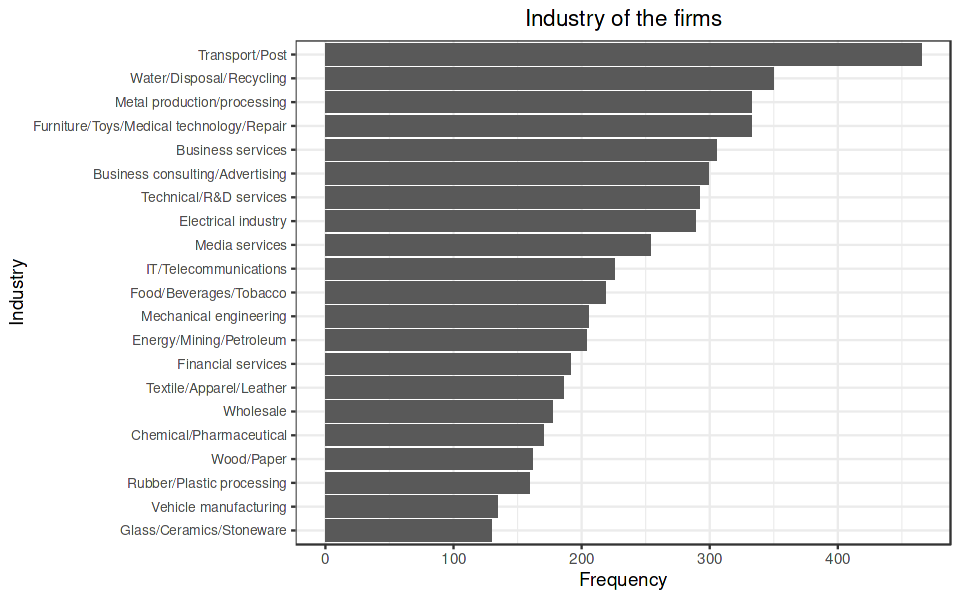

In [18]:
# industry: branche
translation = c("Transport/Post", "Water/Disposal/Recycling", "Metal production/processing",
                "Furniture/Toys/Medical technology/Repair", "Business services",
                "Business consulting/Advertising", "Technical/R&D services",
                "Electrical industry", "Media services", "IT/Telecommunications",
                "Food/Beverages/Tobacco", "Mechanical engineering", "Energy/Mining/Petroleum",
                "Financial services", "Textile/Apparel/Leather", "Wholesale", "Chemical/Pharmaceutical",
                "Wood/Paper", "Rubber/Plastic processing", "Vehicle manufacturing",
                "Glass/Ceramics/Stoneware")
# set graph size
options(repr.plot.width = 8, repr.plot.height = 5)
survey %>%
    # select the column branche
    .[, .(branche)] %>%
    # summarize the frequency of each category
    table() %>%
    as.data.table() %>%
    .[order(-N)] %>%
    # add translation of branche
    .[, industry := translation] %>%
    # plot the bar chart
    ggplot(aes(x = reorder(industry, N), y = N)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(x = "Industry", y = "Frequency", title = "Industry of the firms") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) + 
    theme(axis.text.y = element_text(size = 8))

In [6]:
# bran_4 - big category of industry
survey %>%
    .[, .(bran_4)] %>%
    table() %>%
    as.data.table()

bran_4,N
<chr>,<int>
Forschungsintensive Industrie,798
Sonstige Dienstleistungen,947
Sonstige Industrie,2164
Wissensintensive Dienstleistungen,1174


## Bivariate analysis

We will then look at the relationship between industry and other variables, such as

- bges: full time employees (size of the firm)
- bhsp: share of high skilled employees (with university degree)
- um: sales in million euro (2020, anymous)
- umx: sales in million euro (2020)
- exs: export intensity (share of export in total sales)

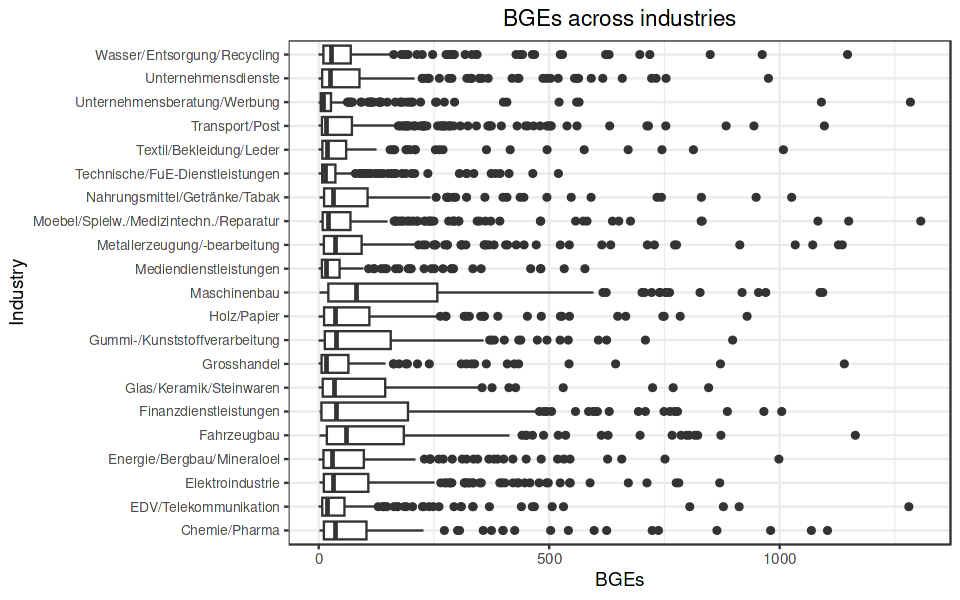

In [8]:
# industy and bges 
# one discrete variable and one continuous variable
# boxplot across groups
survey %>%
    .[, .(branche, bges)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = bges)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "BGEs", title = "BGEs across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As we can see that any industry related to "Manufacturing" employs more people than other industries.
ICT industry in Germany is not very big compared to other industries.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
”


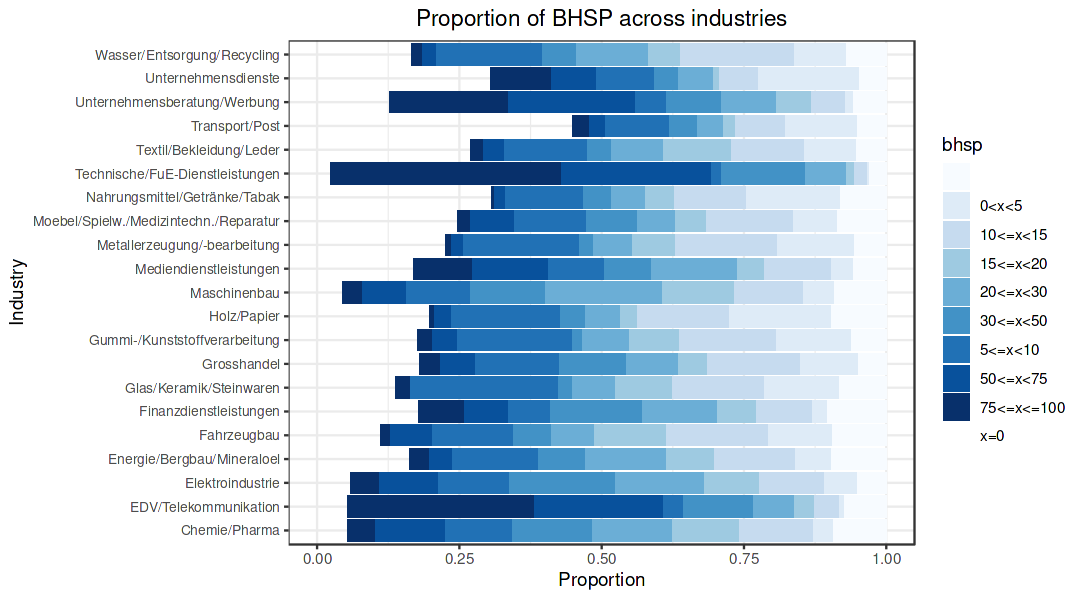

In [16]:
# industry and bhsp
options(repr.plot.width = 9, repr.plot.height = 5)
survey %>%
    .[, .(branche, bhsp)] %>% # head()
    # two categorical variables
    # visualize the contingency table
    ggplot(aes(x = branche, fill = bhsp)) +
    geom_bar(position = "fill") +
    coord_flip() +
    labs(x = "Industry", y = "Proportion", title = "Proportion of BHSP across industries") +
    scale_fill_brewer(palette = "Blues") + # add gradient fill
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As we can see some industries such as ICT (EDV/Telecom), Technische/FuE-Dienstleistungen(technical/R&D services) have higher share of high skilled employees.

In [21]:
# um: sales in 2020 (anymous)
# umx: sales in 2020
survey %>%
    # take a look at the dataset
    .[, .(um, umx)] %>%
    # sample 5 rows from the whole dataset
    .[sample(.N, 5)]

um,umx
<dbl>,<chr>
0.2749661,keine Stutzung
0.0000000,keine Stutzung
8.1164846,keine Stutzung
40.5058229,keine Stutzung
0.2158026,keine Stutzung


We learned that `umx` is not informative, so we will use `um` instead.

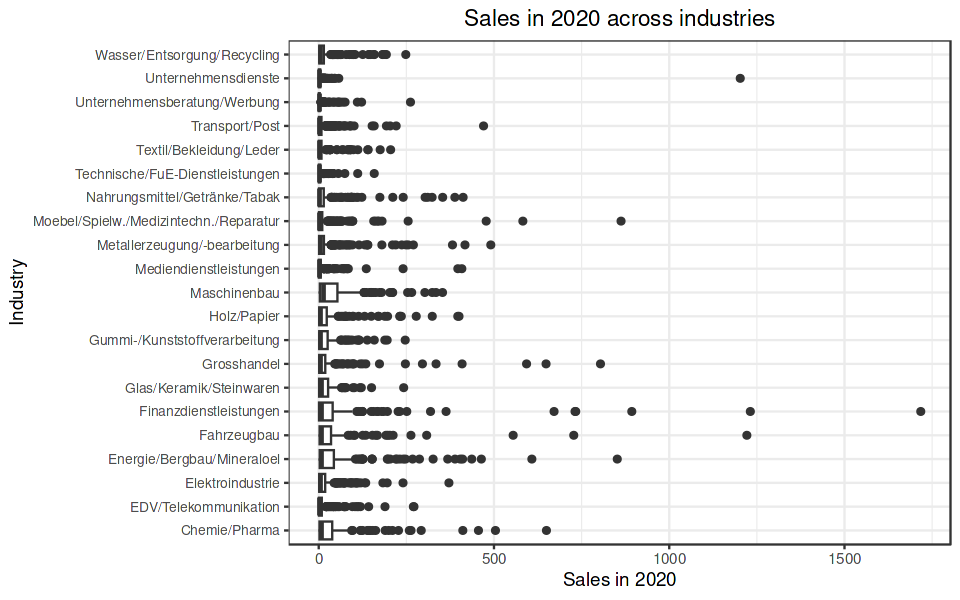

In [24]:
# check the distribution of um across industries
survey %>%
    .[, .(branche, um)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = um)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Sales in 2020", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

__Remark:__ you can see that we have lots of outliers in the data. In business world,
this is very common. Those outliers mean:

- a small share of firms doing very well (dominates the market)
- firms in low 25% percentile are not doing well (may exit the market in the future)

Now, let's understand sales better by transforming it into log scale.

In [26]:
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>% head()

branche,um,um_log
<chr>,<dbl>,<dbl>
Elektroindustrie,2.4437252,1.2365538
Metallerzeugung/-bearbeitung,0.7203522,0.5425291
Maschinenbau,99.5714631,4.6108686
Energie/Bergbau/Mineraloel,197.2720191,5.2896399
Energie/Bergbau/Mineraloel,851.7221776,6.7484338
Elektroindustrie,28.5367212,3.3856343


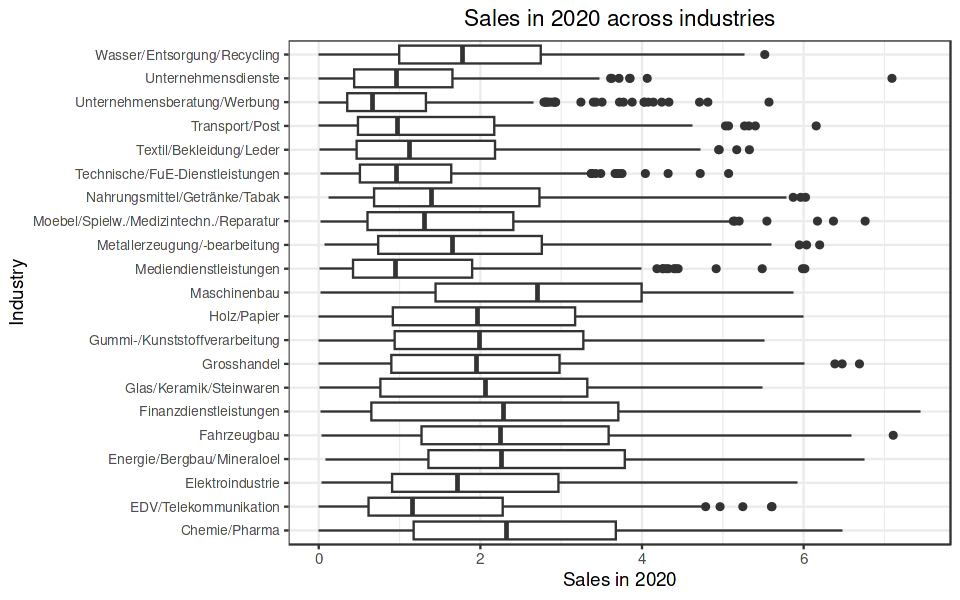

In [27]:
# now plot the boxplot of um_log
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = um_log)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Sales in 2020", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As you can see, with the log scale, the distribution of sales is more similar across industries.
If we focus on the median, we can see that the median sales in ICT industry is lower than other industries. For the chemical industry and machinery industry, the median sales are much higher than other industries.

We could also do histogram for each industry. We do this purly for exploratory purpose.
__You should know that boxplot is good enough for most of the cases.__

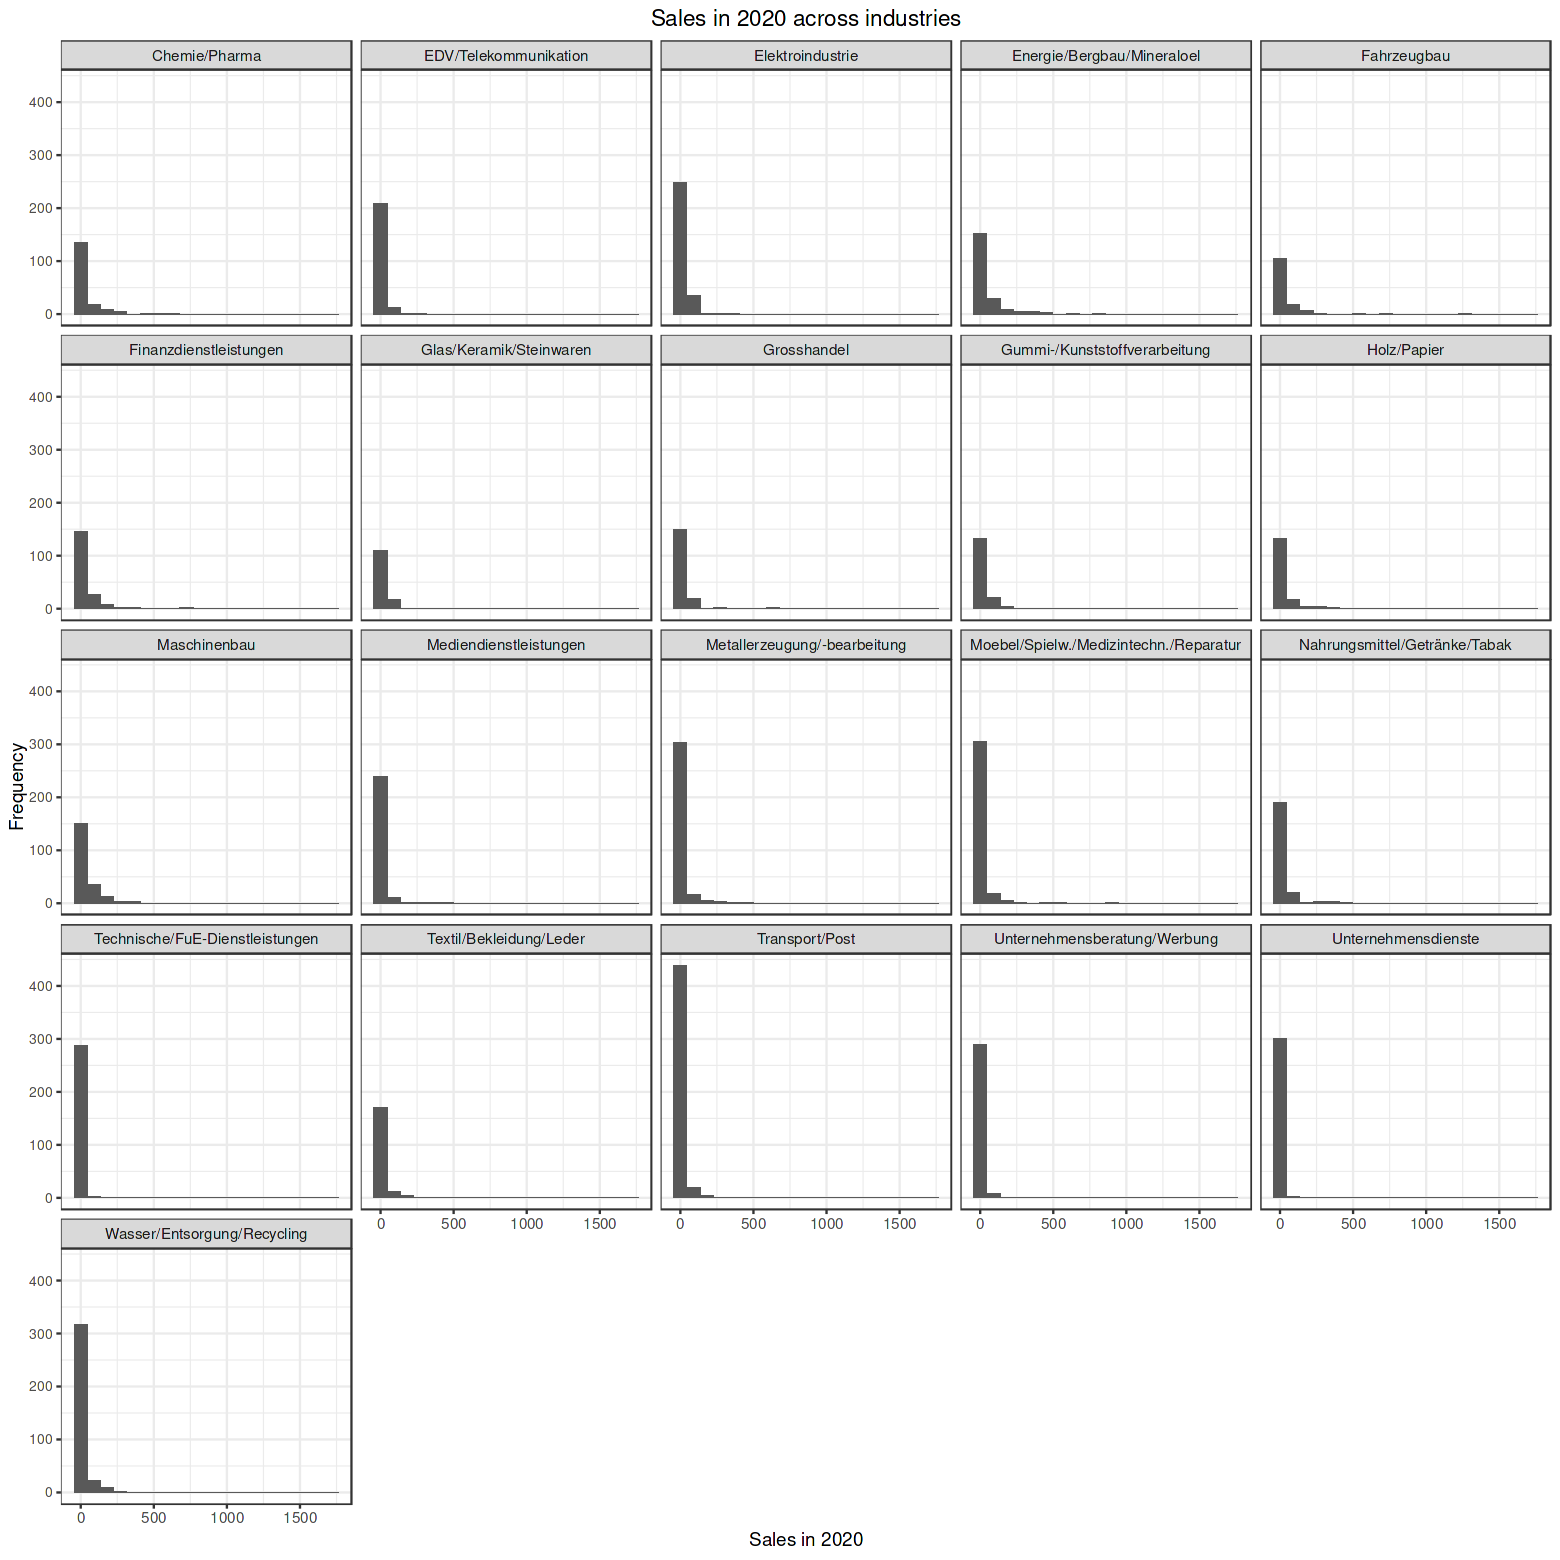

In [38]:
# histogram across groups
options(repr.plot.width = 13, repr.plot.height = 13)
survey %>%
    .[, .(branche, um)] %>%
    # ggplot for histogram with facet
    ggplot(aes(x = um)) +
    geom_histogram(bins = 20) +
    facet_wrap(~branche, ncol = 5) +
    labs(x = "Sales in 2020", y = "Frequency", title = "Sales in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

As you can see that distribution of sales if very skewed. This is very common in business world.

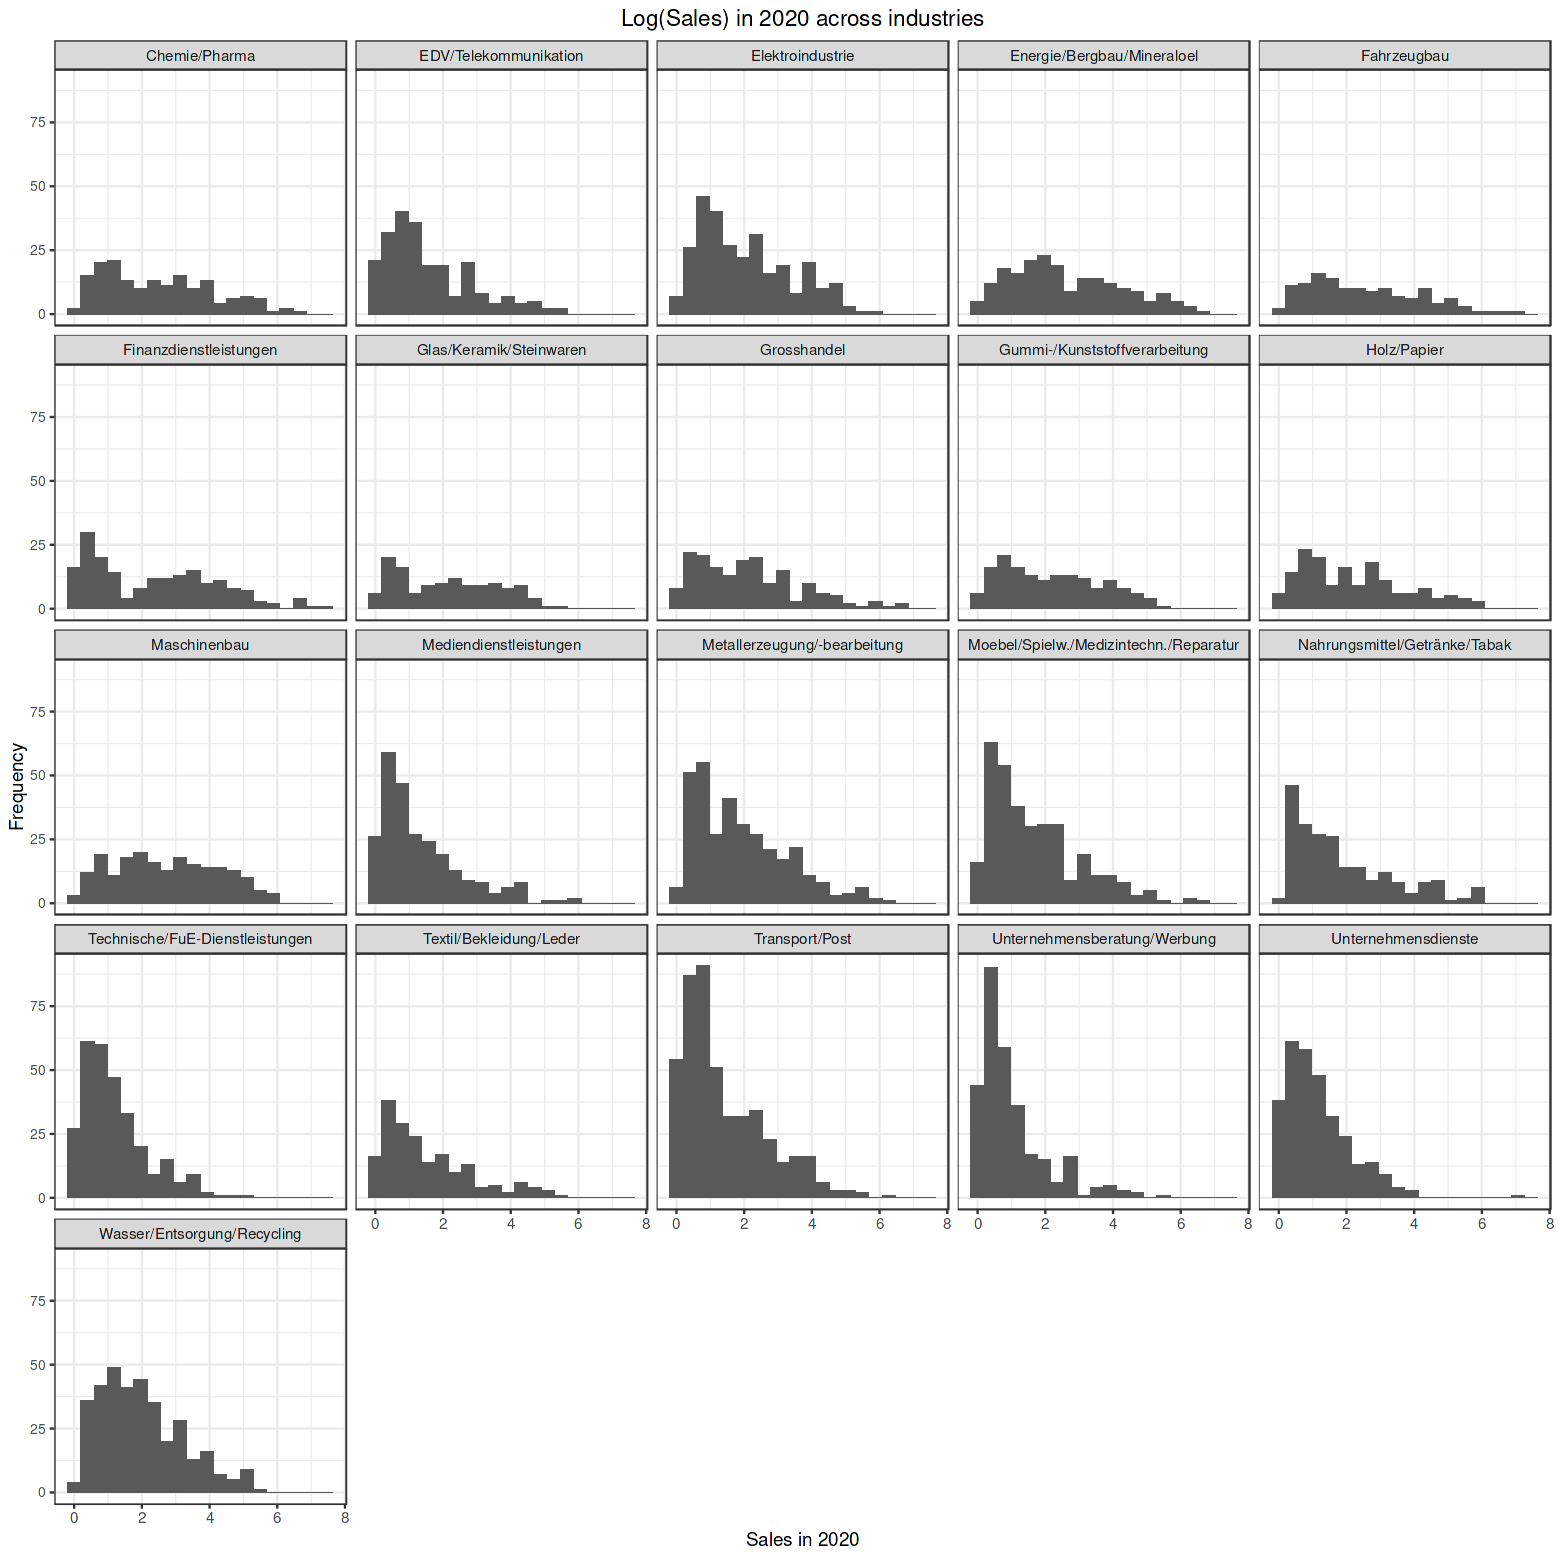

In [37]:
# now, let's do the same thing for um_log
options(repr.plot.width = 13, repr.plot.height = 13)
survey %>%
    .[, .(branche, um)] %>%
    .[, um_log := log(1+um)] %>%
    # ggplot for histogram with facet
    ggplot(aes(x = um_log)) +
    geom_histogram(bins = 20) +
    facet_wrap(~branche, ncol = 5) +
    labs(x = "Sales in 2020", y = "Frequency", title = "Log(Sales) in 2020 across industries") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

The above two figures only shows that log-transformed sales is more like a normal distribution.

In [41]:
# exs: export intensity
survey %>%
    .[, .(branche, exs)] %>% head()

branche,exs
<chr>,<dbl>
Elektroindustrie,0.19714285
Metallerzeugung/-bearbeitung,0.23033708
Maschinenbau,0.91077340
Energie/Bergbau/Mineraloel,0.02379891
Energie/Bergbau/Mineraloel,NA
Elektroindustrie,NA


In [42]:
# we have some missing values, let's check share of missing values
survey %>%
    .[, .(branche, exs)] %>%
    .[, .(missing = sum(is.na(exs)) / .N)] %>% head()

missing
<dbl>
0.111745


In [43]:
# there are 11% missing values, let's remove them
survey %>%
    .[, .(branche, exs)] %>%
    # [i, j, by] grammar, i = rows, j = columns, by = group
    # filter out missing values row by row
    .[!is.na(exs)] %>% head()

branche,exs
<chr>,<dbl>
Elektroindustrie,0.19714285
Metallerzeugung/-bearbeitung,0.23033708
Maschinenbau,0.91077340
Energie/Bergbau/Mineraloel,0.02379891
Energie/Bergbau/Mineraloel,0.00000000
Gummi-/Kunststoffverarbeitung,0.35136464


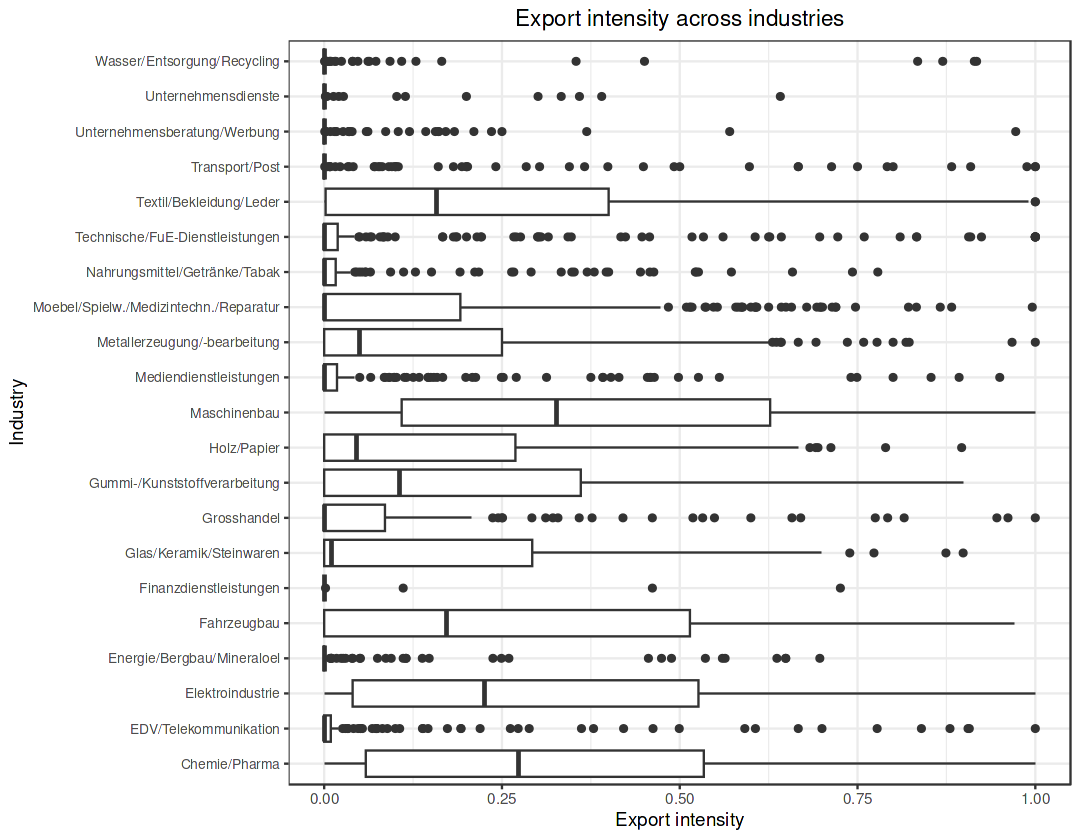

In [46]:
options(repr.plot.width = 9, repr.plot.height = 7)
survey %>%
    .[, .(branche, exs)] %>%
    .[!is.na(exs)] %>%
    # boxplot across groups
    ggplot(aes(x = branche, y = exs)) +
    geom_boxplot() +
    coord_flip() +
    labs(x = "Industry", y = "Export intensity", title = "Export intensity across industries") +
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

When export intensity is high, it means that German firms are very competitive in the world market.
From the above figure, we can see that following industries are very competitive in the world market:

- Chemical industry
- Machinery industry
- Electrical industry

So, __it is all about Cars, Chemicals, and Machines.__ in German. 

In [47]:
# how about correlation between um and exs?
survey %>%
    .[, .(um, exs)] %>%
    .[!is.na(exs)] %>%
    cor()

,um,exs
um,1.000000,0.173552
exs,0.173552,1.000000


In [48]:
# we can see that correlation is not very strong
# but the above correlation does not take into account the industry
# let's check correlation within each industry
survey %>%
    .[, .(branche, um, exs)] %>%
    .[!is.na(exs)] %>%
    # calculate correlation within each industry
    .[, .(cor = cor(um, exs)), by = branche] %>%
    # sort by correlation
    .[order(-cor)]

branche,cor
<chr>,<dbl>
Holz/Papier,0.4897273642
Maschinenbau,0.4275007485
Gummi-/Kunststoffverarbeitung,0.4175054244
Metallerzeugung/-bearbeitung,0.3409828074
Nahrungsmittel/Getränke/Tabak,0.2953863857
Textil/Bekleidung/Leder,0.2664852142
Unternehmensberatung/Werbung,0.2414337130
Grosshandel,0.2410844923
Elektroindustrie,0.2186389755


One should pay attention that the correlation for `Chemie/Pharma` is not very high. This means that
some firms in this industry are not very competitive in the world market, which is very interesting.
Therefore, one should address this issue in the future.

## Importance of Competitive Strategies

![survey-1.9](qs_1.9.png)

There are 10 choices for this question, and each choice is an ordinal variable, ranging from
none, low, medium, to high.

Again, let's do univariate analysis first:
- improving existing goods or services (wettstr1)

In [54]:
survey %>%
    .[, .(wettstr1)] %>%
    # get table
    table()

wettstr1
       gering   hoch mittel   nein 
   490    571   1940   1454    628 

__Remark:__ Missing values are tricky. In this case, the missing values are 
just empty strings. So, we need to delete them first.

In [56]:
survey %>%
    .[, .(wettstr1)] %>%
    # drop missing values (empty string)
    .[wettstr1 != ""] %>%
    str()  # you can see sample size is 4593 not 5083

Classes ‘data.table’ and 'data.frame':	4593 obs. of  1 variable:
 $ wettstr1: chr  "mittel" "nein" "hoch" "hoch" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [58]:
# get the frequency table for different industries
survey %>%
    .[, .(branche, wettstr1)] %>%
    .[wettstr1 != ""] %>%
    # get the frequency table
    table()

                                        wettstr1
branche                                  gering hoch mittel nein
  Chemie/Pharma                              13   72     53   13
  EDV/Telekommunikation                      16  120     53   15
  Elektroindustrie                           19  147     85   14
  Energie/Bergbau/Mineraloel                 33   39     57   48
  Fahrzeugbau                                 7   68     42    4
  Finanzdienstleistungen                     23   77     60   17
  Glas/Keramik/Steinwaren                    14   47     38   18
  Grosshandel                                27   51     45   38
  Gummi-/Kunststoffverarbeitung              21   69     45    5
  Holz/Papier                                16   59     59   15
  Maschinenbau                               15  110     58    6
  Mediendienstleistungen                     30  106     77   21
  Metallerzeugung/-bearbeitung               45  133    100   28
  Moebel/Spielw./Medizintechn./Reparatur 

## How to visualize ordinal variables?

When we have one discrete variable and one ordinal variable, we can use

- stacked bar chart
- heatmap

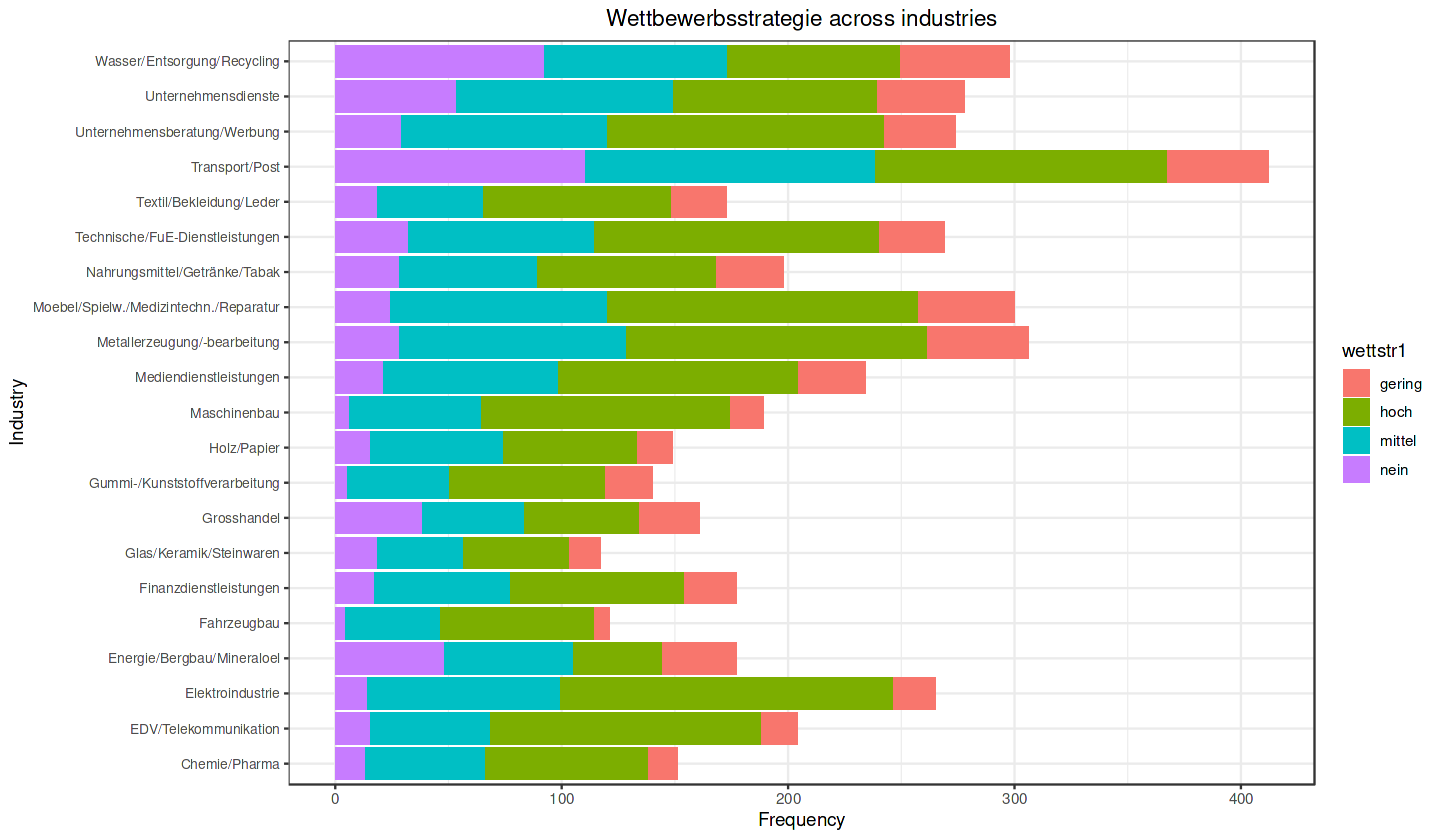

In [63]:
# stacked bar chart
options(repr.plot.width = 12, repr.plot.height = 7)
survey %>%
    .[, .(branche, wettstr1)] %>%
    .[wettstr1 != ""] %>%
    # get the frequency table
    table() %>%
    as.data.table() %>%
    ggplot(aes(x = branche, y = N, fill = wettstr1)) +
    geom_bar(stat = "identity") +
    # flip the x and y axis
    coord_flip() +
    labs(x = "Industry", y = "Frequency", title = "Wettbewerbsstrategie across industries") +
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.y = element_text(size = 8))

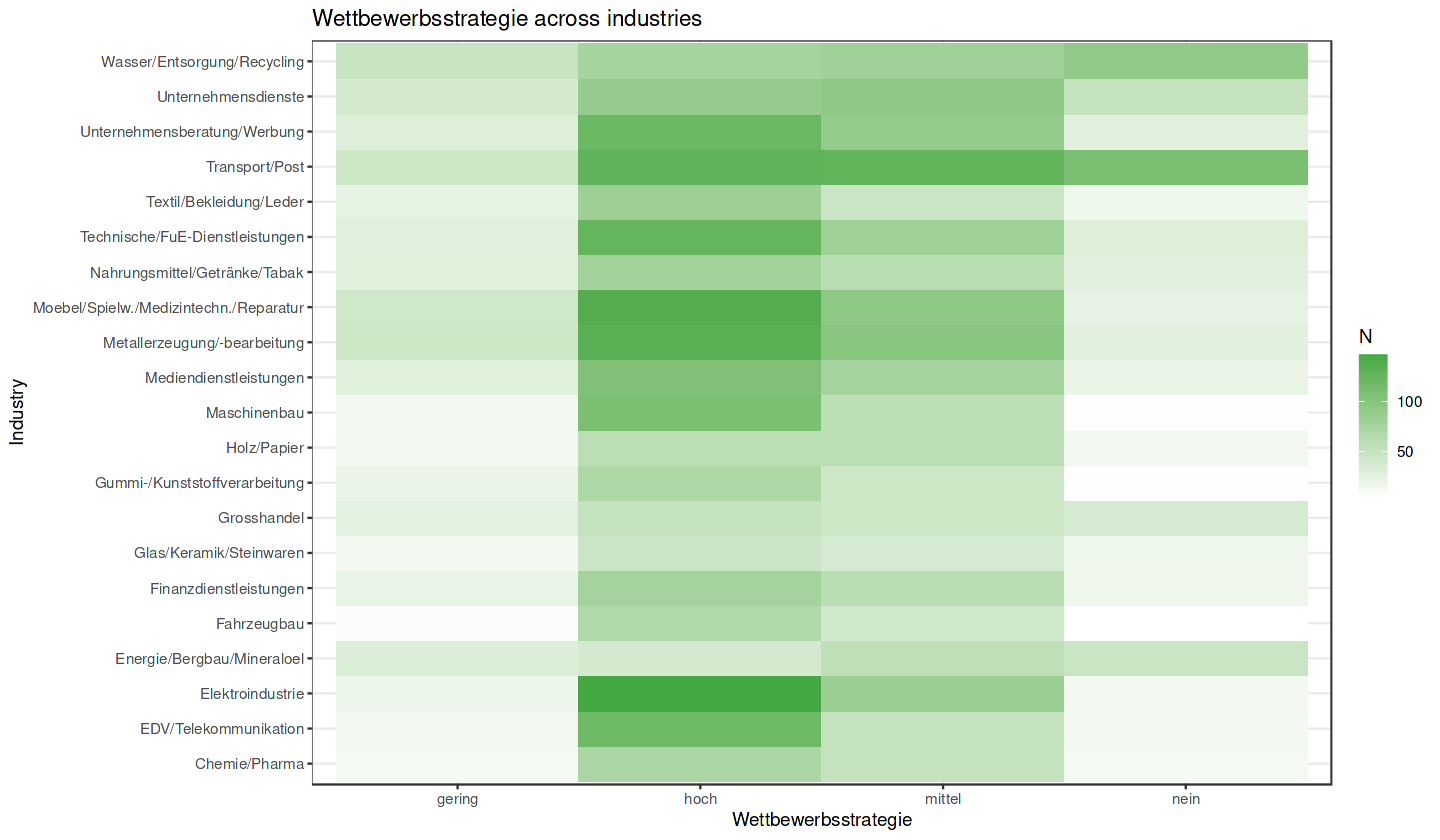

In [70]:
options(repr.plot.width = 12, repr.plot.height = 7)
survey %>%
    .[, .(branche, wettstr1)] %>%
    .[wettstr1 != ""] %>%
    # get the frequency table
    table() %>%
    as.data.table() %>%
    # heatmap
    ggplot(aes(x = branche, y = wettstr1, fill = N)) +
    geom_tile() +
    # flip the x and y axis
    coord_flip() +
    labs(x = "Industry", y = "Wettbewerbsstrategie", title = "Wettbewerbsstrategie across industries") +
    theme_bw() + 
    scale_fill_gradient(low = "white", high = "#44A842", na.value = "grey90",
                            guide = "colorbar") 


## Write a function to do things repeatedly

We can write a function to do things repeatedly. For example, we can write a function to
plot the heatmap for each industry as heatmap is a good way to visualize ordinal variables.

In [84]:
wettstr_plot <- function(dt, wettstr_variable, variable_text) {
    dt %>%
        .[, .(branche, wettstr_variable)] %>%
        .[wettstr_variable != ""] %>%
        table() %>%
        as.data.table() %>%
        ggplot(aes(x = branche, y = wettstr_variable, fill = N)) +
        geom_tile() +
        # flip the x and y axis
        coord_flip() + 
        labs(x = "Industry", y = "Wettbewerbsstrategie", 
                        title = variable_text) +
        theme_bw() + 
        scale_fill_gradient(low = "white", high = "#44A842", na.value = "grey90",
                            guide = "colorbar") 
        
}

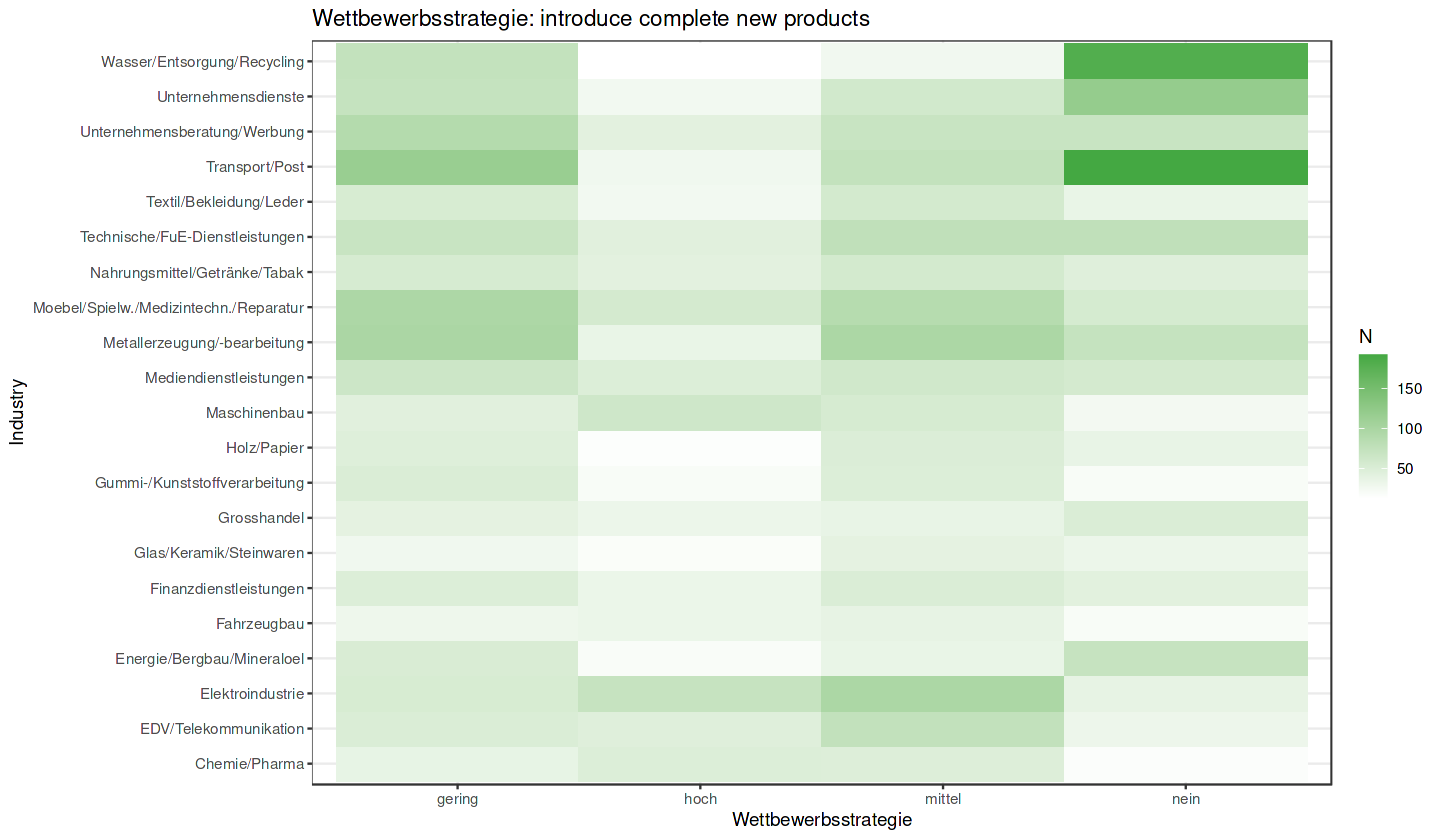

In [90]:
# plot wettstr2: introduce complete new products
survey %>%
    with(wettstr_plot(., wettstr2, "Wettbewerbsstrategie: introduce complete new products"))

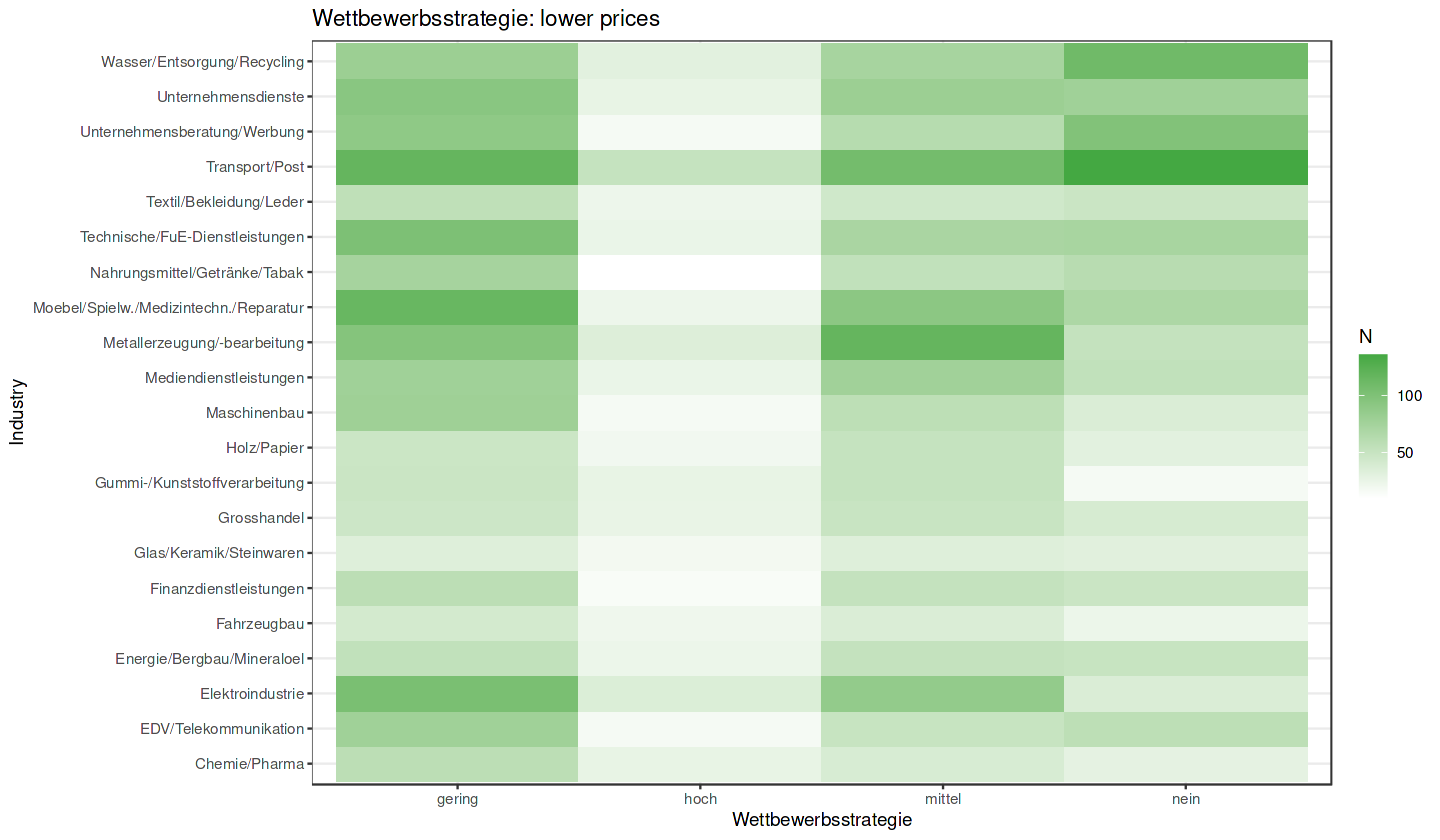

In [92]:
# plot wettstr3: lower prices
survey %>%
    with(wettstr_plot(., wettstr3, "Wettbewerbsstrategie: lower prices"))

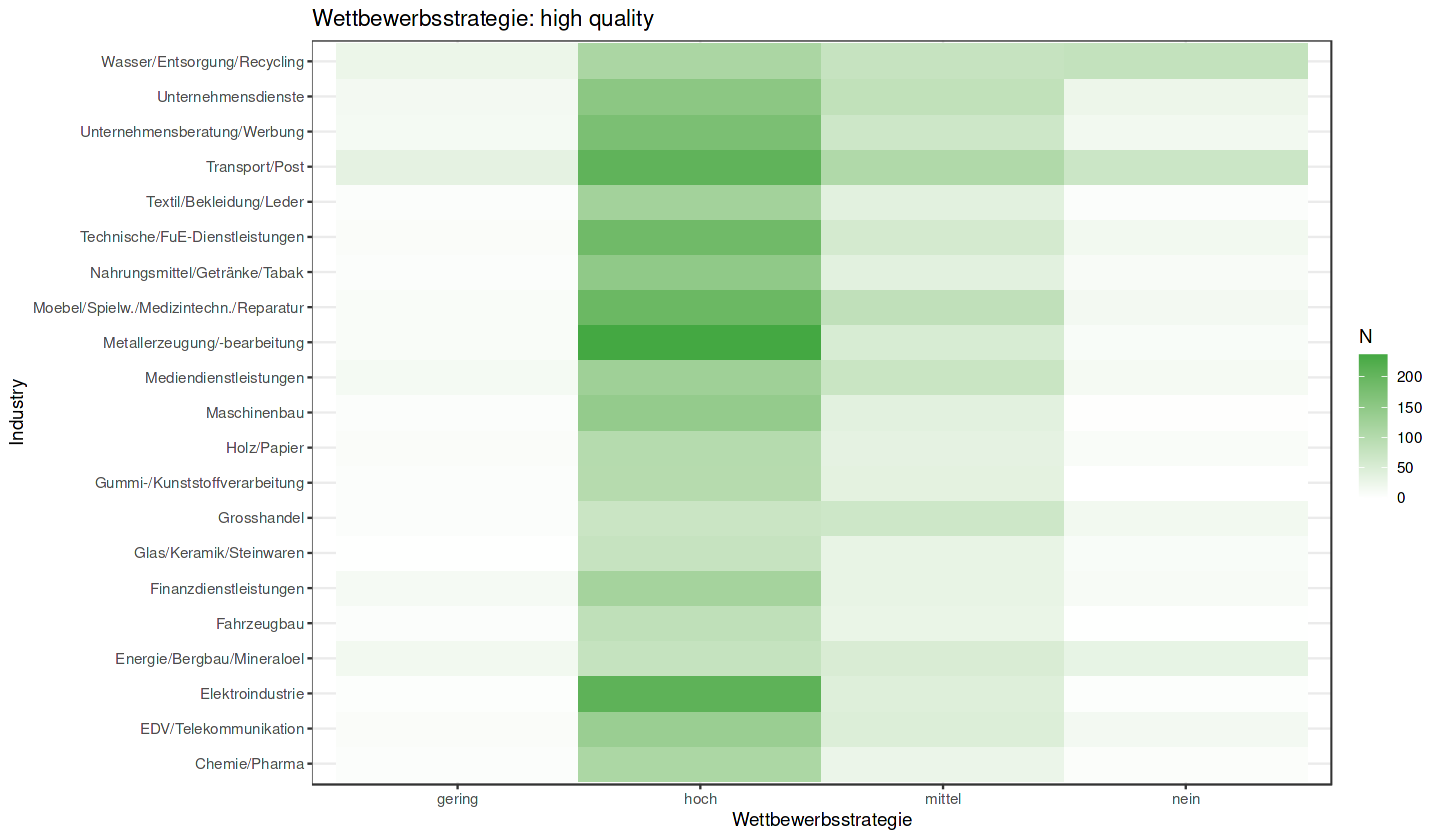

In [93]:
# high quality
survey %>%
    with(wettstr_plot(., wettstr4, "Wettbewerbsstrategie: high quality"))

## Work with ordinal variables

This is our first time to work with ordinal variabales. We need to come up with a way to
make the ordinal variables comparable. Here is the dimension of our concern:

- industry
- ordinal variable
- share of firms in each category that choose `high` for the ordinal variable

__This is a complex problem, and we need to think about it carefully.__ Here is my solution:

1. For each industry, we calculate the share of firms in each category that choose `high` for the ordinal variable.
2. We then compare the share of firms who choose `high` for the ordinal variable across industries.

In [96]:
# we need to select the columns we want to use
# branchen: industry
# wetts1 to wetts10
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    head()

branche,wettstr1,wettstr2,wettstr3,wettstr4,wettstr5,wettstr6,wettstr7,wettstr8,wettstr9,wettstr10
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Elektroindustrie,mittel,mittel,gering,hoch,mittel,nein,mittel,mittel,,hoch
Metallerzeugung/-bearbeitung,nein,nein,gering,hoch,mittel,mittel,hoch,gering,gering,mittel
Maschinenbau,hoch,hoch,mittel,mittel,gering,nein,hoch,nein,mittel,gering
Energie/Bergbau/Mineraloel,,,,,,,,,,
Energie/Bergbau/Mineraloel,,mittel,nein,hoch,mittel,gering,hoch,mittel,mittel,mittel
Elektroindustrie,,,,,,,,,,


In [98]:
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    # check empty string for each column
    # the following command is given by the AI 
    # .SDcols means subset of columns
    # .SD means we will apply the function to the subset of columns
    .[, lapply(.SD, function(x) sum(x == "")), .SDcols = paste0("wettstr", 1:10)]

wettstr1,wettstr2,wettstr3,wettstr4,wettstr5,wettstr6,wettstr7,wettstr8,wettstr9,wettstr10
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
490,519,523,469,503,549,488,494,520,480


In [99]:
# we could also check empty string based on the industry
# we are curious about the share of empty string for each industry
# it might tell us some information about the industry
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    # group by industry
    .[, lapply(.SD, function(x) sum(x == "")), by = branche, .SDcols = paste0("wettstr", 1:10)]

branche,wettstr1,wettstr2,wettstr3,wettstr4,wettstr5,wettstr6,wettstr7,wettstr8,wettstr9,wettstr10
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Elektroindustrie,24,29,27,26,27,31,30,29,28,23
Metallerzeugung/-bearbeitung,27,31,32,25,27,29,31,27,29,28
Maschinenbau,16,18,17,16,17,19,18,18,16,18
Energie/Bergbau/Mineraloel,27,27,25,24,25,27,23,23,26,23
Gummi-/Kunststoffverarbeitung,19,19,18,18,19,19,18,19,19,17
Nahrungsmittel/Getränke/Tabak,21,18,21,17,19,20,18,17,20,22
Fahrzeugbau,13,13,13,13,15,16,13,15,14,13
Technische/FuE-Dienstleistungen,23,25,23,20,22,27,20,19,24,20
Mediendienstleistungen,20,22,21,23,25,24,20,19,24,19


In [101]:
# let's convert to the long format
# import concept!! (melt is very useful, which is the opposite of dcast)
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    # group by industry
    .[, lapply(.SD, function(x) sum(x == "")), by = branche, .SDcols = paste0("wettstr", 1:10)] %>%
    # convert to long format
    melt(id.vars = "branche") %>% head()

branche,variable,value
<chr>,<fct>,<int>
Elektroindustrie,wettstr1,24
Metallerzeugung/-bearbeitung,wettstr1,27
Maschinenbau,wettstr1,16
Energie/Bergbau/Mineraloel,wettstr1,27
Gummi-/Kunststoffverarbeitung,wettstr1,19
Nahrungsmittel/Getränke/Tabak,wettstr1,21


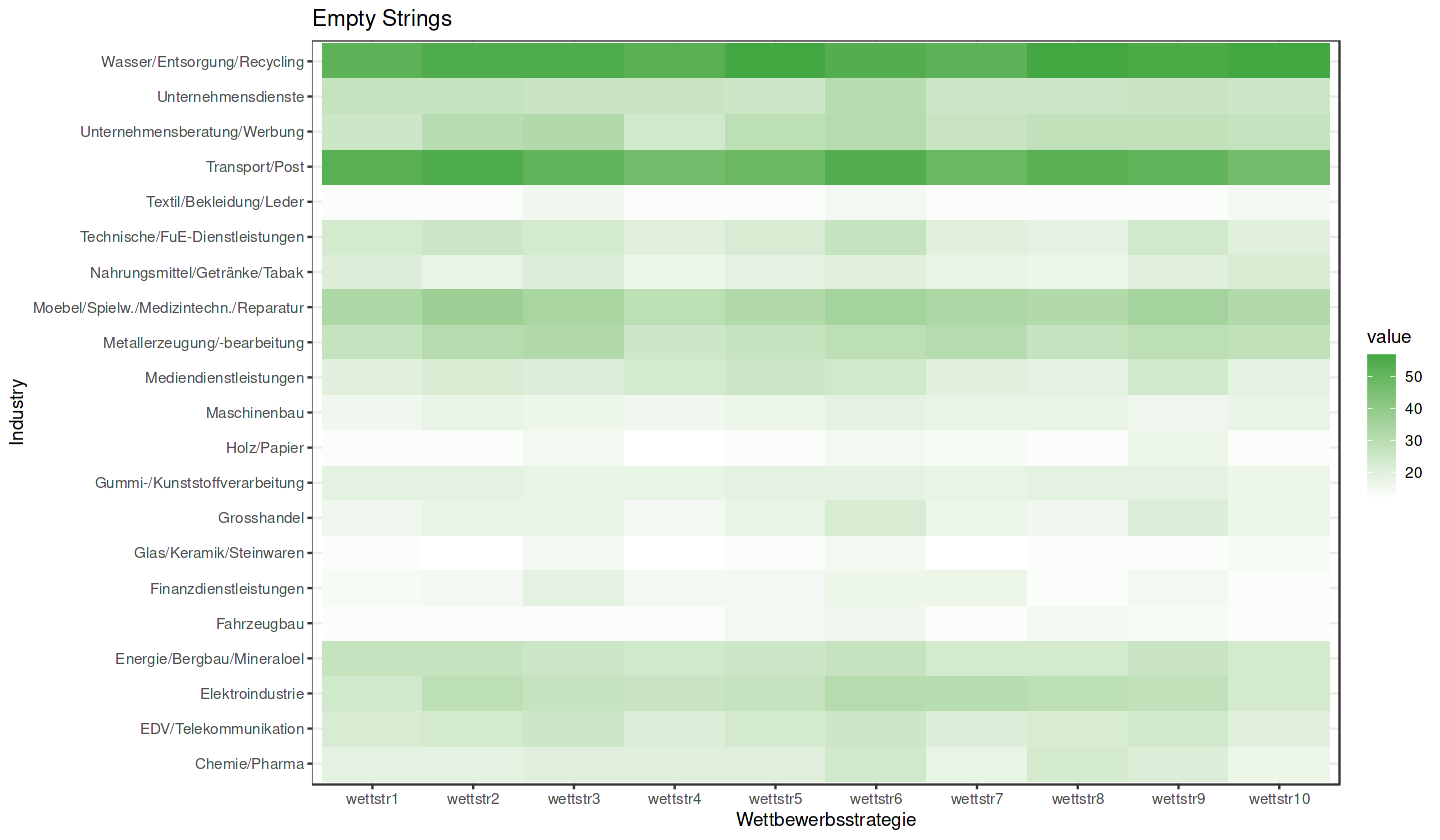

In [105]:
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    # group by industry
    .[, lapply(.SD, function(x) sum(x == "")), by = branche, .SDcols = paste0("wettstr", 1:10)] %>%
    # convert to long format
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "Wettbewerbsstrategie", title = "Empty Strings") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#44A842", na.value = "grey90",
                            guide = "colorbar")

__Remark:__ We learned that two industries having systematic `self-selection` bias, which
means that they are less willing to share their information. Therefore, we should not
compare them with other industries. __BUT__, since the difference is not very big, we can
ignore this issue for now.

Let's get back to our problem: 

1. For each industry, we calculate the share of firms in each category that choose `high` for the ordinal variable.
2. We then compare the share of firms who choose `high` for the ordinal variable across industries.

In [106]:
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    head()

branche,wettstr1,wettstr2,wettstr3,wettstr4,wettstr5,wettstr6,wettstr7,wettstr8,wettstr9,wettstr10
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Elektroindustrie,mittel,mittel,gering,hoch,mittel,nein,mittel,mittel,,hoch
Metallerzeugung/-bearbeitung,nein,nein,gering,hoch,mittel,mittel,hoch,gering,gering,mittel
Maschinenbau,hoch,hoch,mittel,mittel,gering,nein,hoch,nein,mittel,gering
Energie/Bergbau/Mineraloel,,,,,,,,,,
Energie/Bergbau/Mineraloel,,mittel,nein,hoch,mittel,gering,hoch,mittel,mittel,mittel
Elektroindustrie,,,,,,,,,,


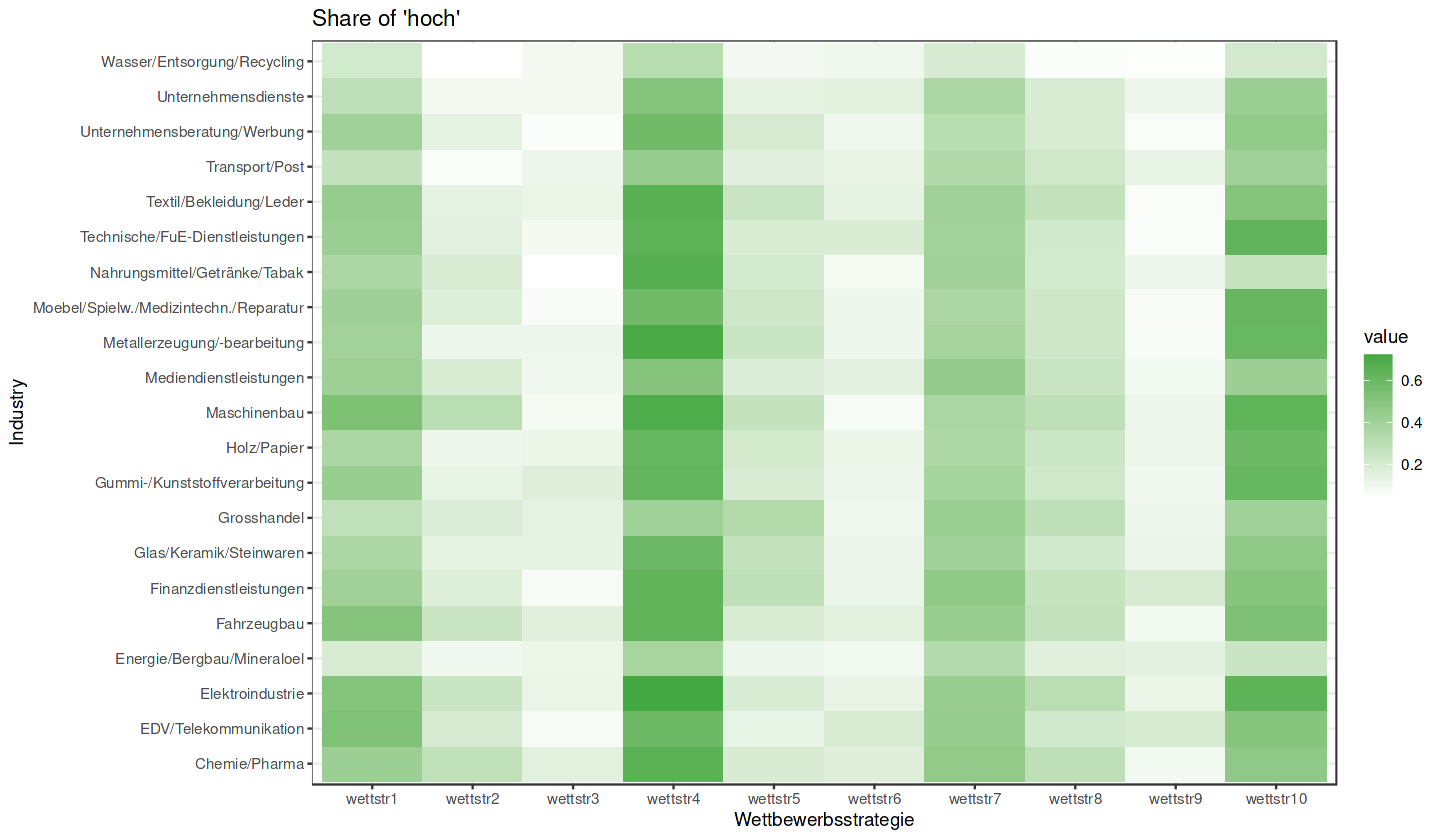

In [109]:
survey %>%
    .[, c("branche", paste0("wettstr", 1:10))] %>%
    # calculate the share of 'hoch' for each industry
    .[, lapply(.SD, function(x) sum(x == "hoch") / length(x)),
                by = branche, .SDcols = paste0("wettstr", 1:10)] %>%
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "Wettbewerbsstrategie", title = "Share of 'hoch'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#44A842", na.value = "grey90",
                            guide = "colorbar")

## Question 1.10: five forces analysis and competitive strategies

![survey-1.10](qs_1.10.png)


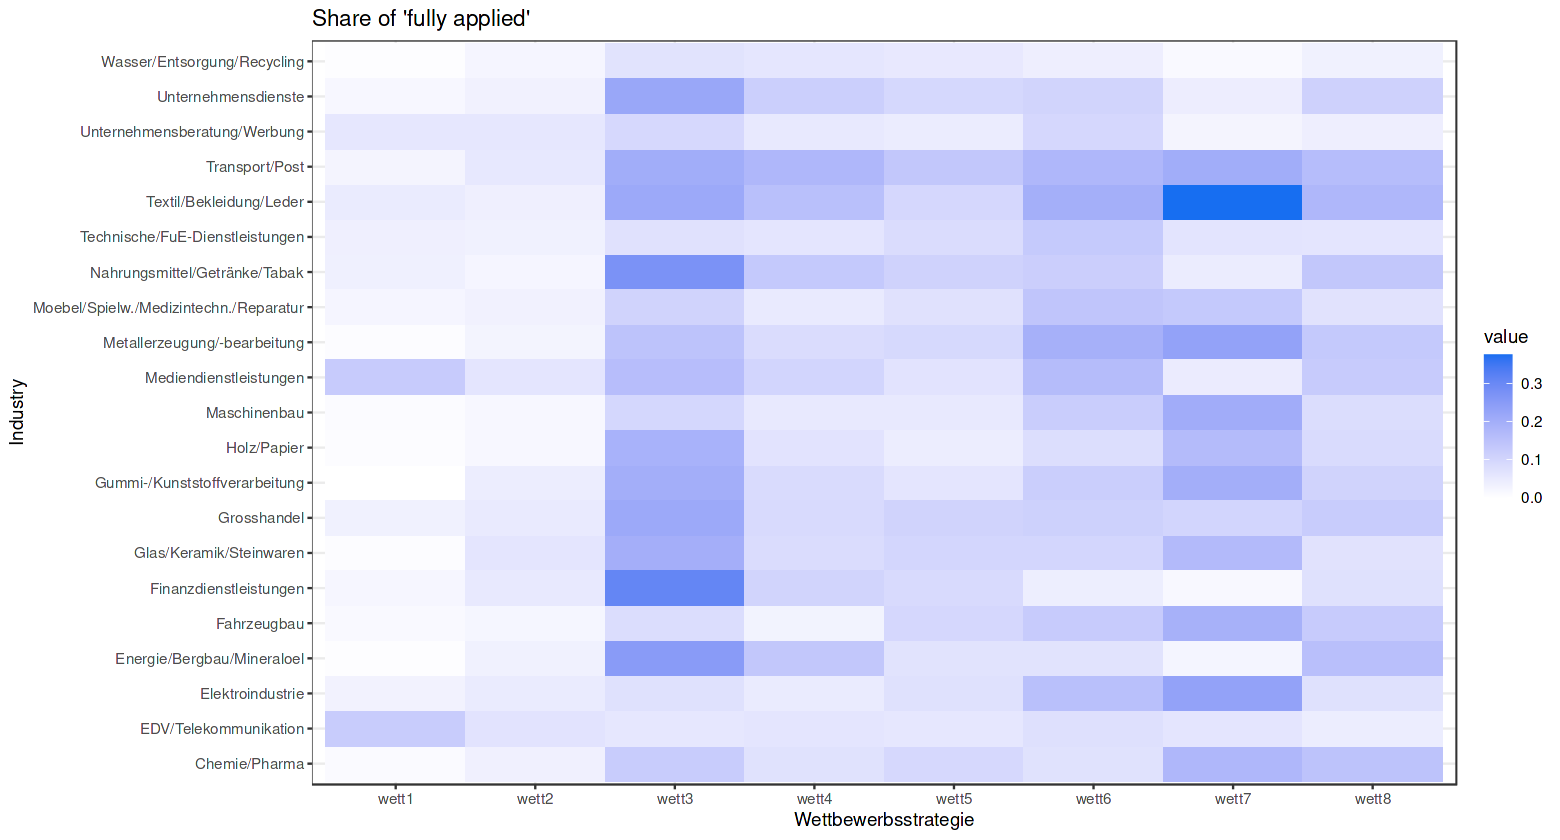

In [14]:
# wett1 to wett8
# we will focus on trifft voll zu (fully agree)
# trifft nicht zu (fully disagree)
options(repr.plot.width = 13, repr.plot.height = 7)
survey %>%
    .[, c("branche", paste0("wett", 1:8))] %>%
    # calculate the share of 'trifft voll zu' for each industry
    .[, lapply(.SD, function(x) sum(x == "trifft voll zu") / length(x)),
                by = branche, .SDcols = paste0("wett", 1:8)] %>%
    # convert to long format
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "Wettbewerbsstrategie", title = "Share of 'fully applied'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#176EF1", na.value = "grey90",
                            guide = "colorbar")

The above figure shows the five forces analysis for each industry. The five forces are:

- threat of new entrants
- bargaining power of suppliers
- bargaining power of buyers (demand side)
- threat of substitutes
- rivalry among existing competitors

It is very interesting to see that wett1 (products/services become outdated quickly) is
the most important factor for ICT industry. This is very true in the real world.
However, for textile industry, this is not the case. This is also very true in the real world. However, the competition from abroad is very important for textile industry, which is probably due to the fact that textile industry is very labor intensive, where China and India have a big advantage.

## Q 1.11 : climate change

![survey-1.11](qs_1.11.png)

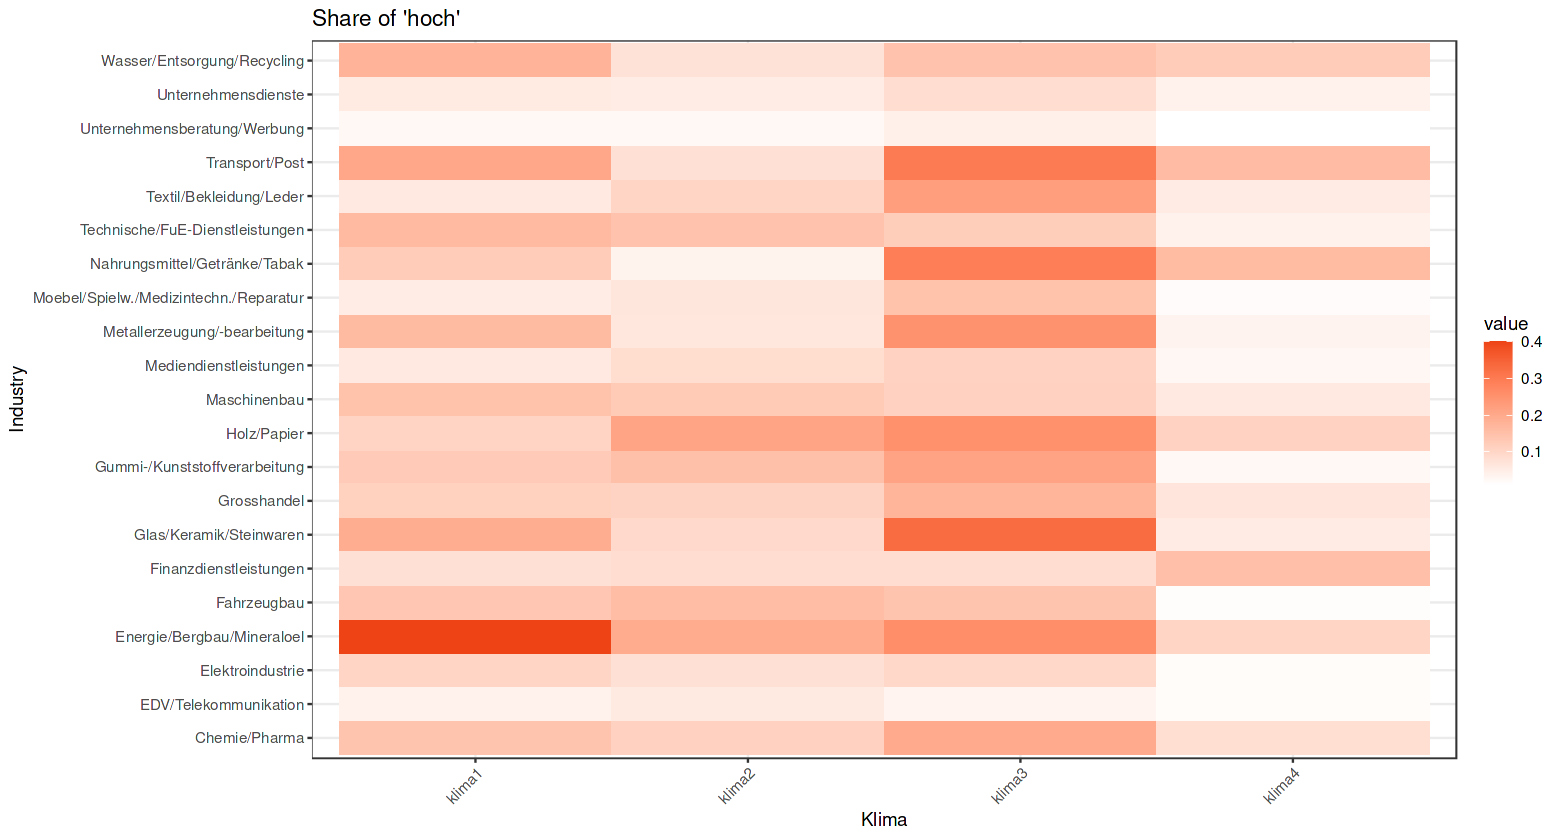

In [24]:
# klima1 to klima4
survey %>%
    .[, c("branche", paste0("klima", 1:4))] %>%
    # calculate the share of 'hoch' for each industry
    .[, lapply(.SD, function(x) sum(x == "hoch") / length(x)),
                by = branche, .SDcols = paste0("klima", 1:4)] %>%
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "Klima", title = "Share of 'hoch'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#ee4415", na.value = "grey90",
                            guide = "colorbar") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Product/Service Innovation

In section one, we learned snapshot of the German economy based on industry analysis.
In this section, we will look at product/service innovation.

![survey-section2](section2.png)

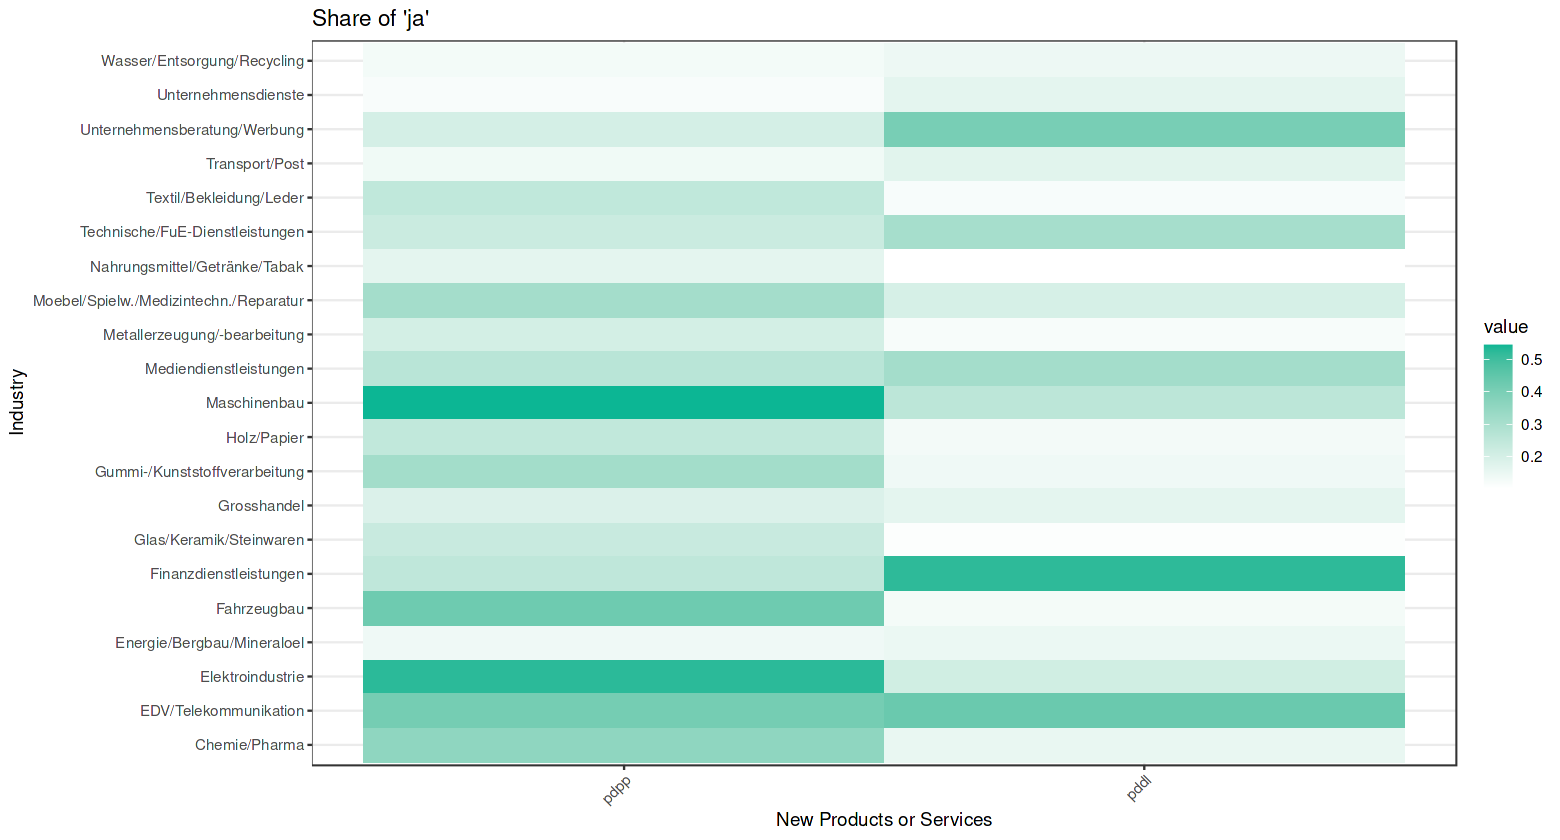

In [31]:
# filter out pdpp/pddl == yes
survey %>%
    # check which industry introduces new products
    .[, lapply(.SD, function(x) sum(x == "ja") / length(x)),
                by = branche, .SDcols = c("pdpp", "pddl")] %>%
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "New Products or Services", title = "Share of 'ja'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#0cb694", na.value = "grey90",
                            guide = "colorbar") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

We can see that only half of the firms have product/service innovation for some industries.
For most of the industries, the share of firms having product/service innovation is around 30%.

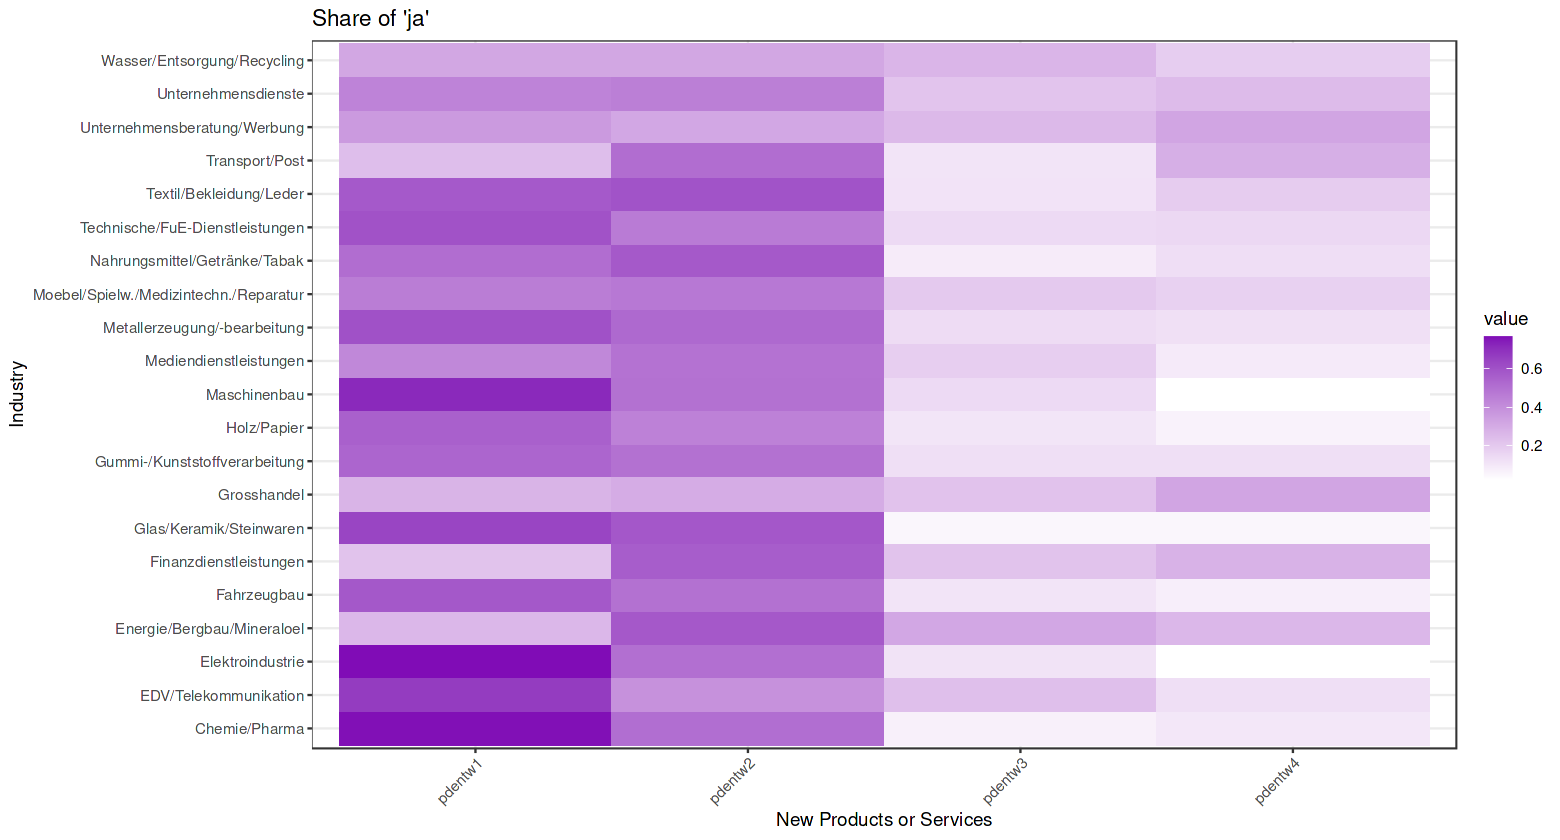

In [9]:
# pdentw1         byte    %8.0g      janein     Unternehmen alleine
# pdentw2         byte    %8.0g      janein     Unternehmen in Zusammenarbeit mit Dritten
# pdentw3         byte    %8.0g      janein     Unternehmen durch Anpassung von Produkten/Dienstleistungen anderer
# pdentw4         byte    %8.0g      janein     Andere Unternehmen/Einrichtungen
# let's check who developed those 
options(repr.plot.width = 13, repr.plot.height = 7)
survey %>%
    # filter out pdpp/pddl == yes
    .[pdpp == "ja" | pddl == "ja", ] %>%
    .[, c("branche", paste0("pdentw", 1:4))] %>%
    # calculate the share of 'ja' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja") / length(x)),
                by = branche, .SDcols = paste0("pdentw", 1:4)] %>%
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "New Products or Services", title = "Share of 'ja'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#800cb6", na.value = "grey90",
                            guide = "colorbar") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


We can see that most of firms innovate in-house and collaborate with other firms at 
the same time. This is very common in the real world.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
”


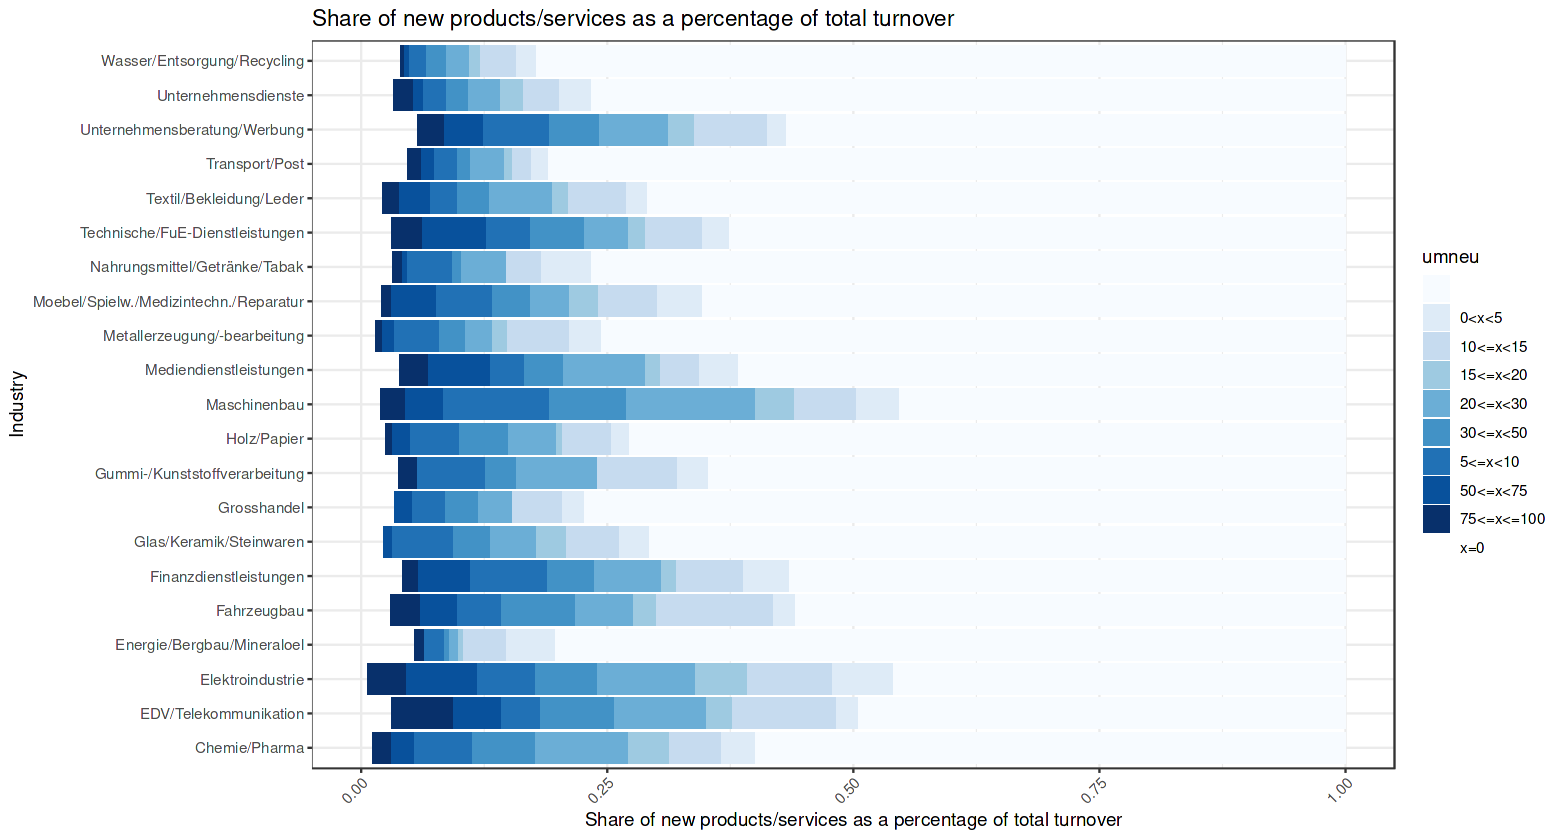

In [12]:
# umneu: share of new products/services as a percentage of total turnover
survey %>%
    .[, c("branche", "umneu")] %>%
    # visualize contigeny table
    ggplot(aes(x = branche, fill = umneu)) +
    geom_bar(position = "fill") +
    coord_flip() +
    labs(x = "Industry", y = "Share of new products/services as a percentage of total turnover",
            title = "Share of new products/services as a percentage of total turnover") +
    theme_bw() +
    scale_fill_brewer(palette = "Blues") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


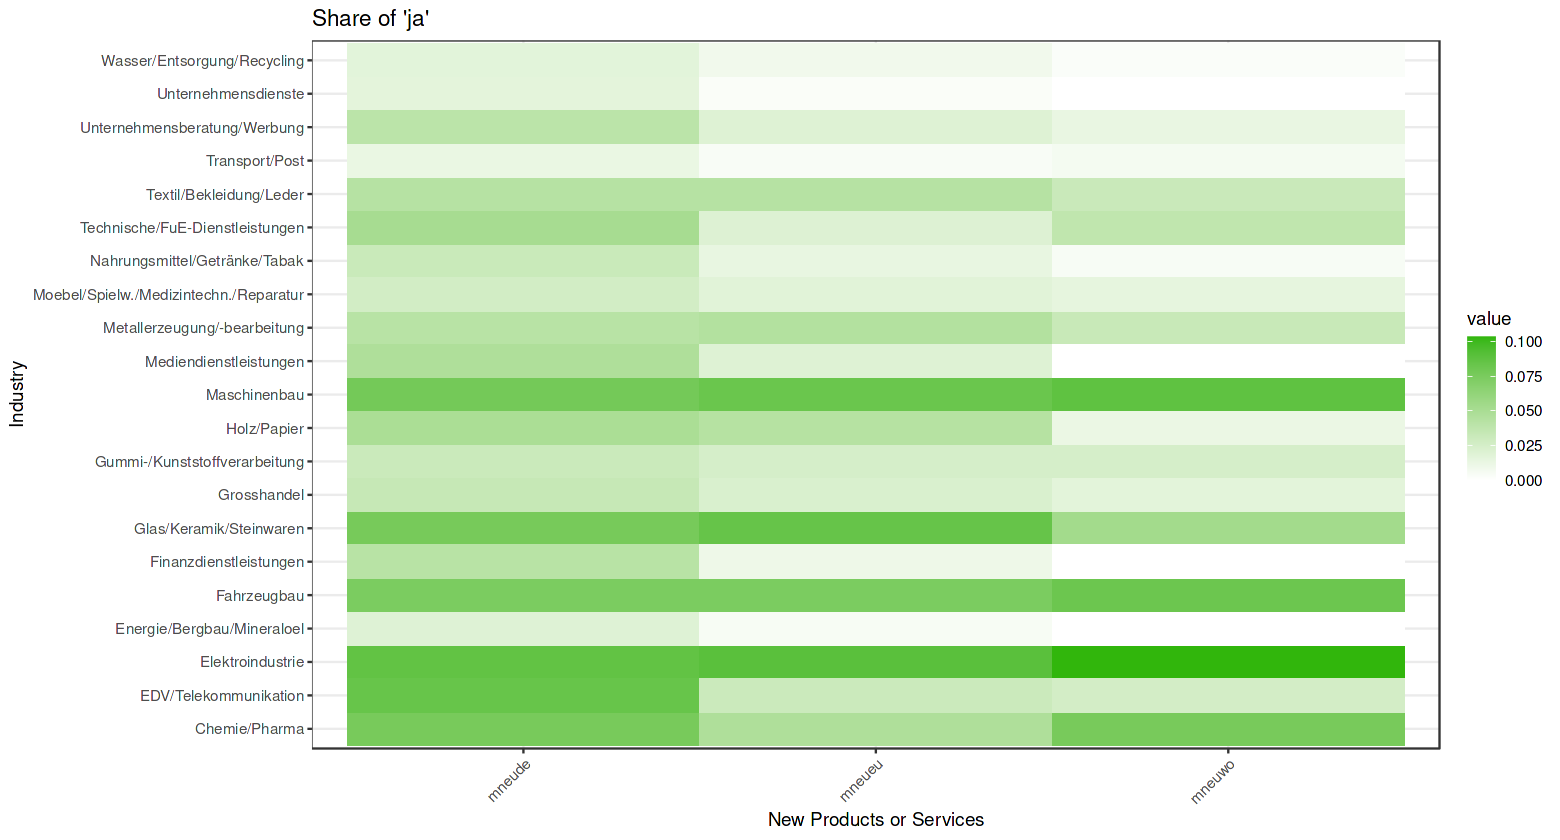

In [19]:
# mneup float %10.0g Scale2 Scale value: Sales share with market novelties
# mneude byte %8.0g yes no novelties for the local/German market
# mneueu byte %8.0g yes no Novelties for the European market
# mneuwo byte %8.0g yes yes Novelties for the world market
# mneuka byte %8.0g yanein Novelties not known
# wmneup float %9.0g Sales share of world market novelties in 2020
survey %>%
    .[, .(branche, mneup, mneude, mneueu, mneuwo, mneuka, wmneup)] %>%
    # focus on mneude, mneueu, mneuwo
    # calculate the share of 'ja' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja") / length(x)),
                by = branche, .SDcols = c("mneude", "mneueu", "mneuwo")] %>%
    # heatmap
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "New Products or Services", title = "Share of 'ja'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#31b60c", na.value = "grey90",
                            guide = "colorbar") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Business Process Innovation

![survey-section3](section3.png)


We will look at the relationship between business process innovation and other variables. We will focus on the following variables.

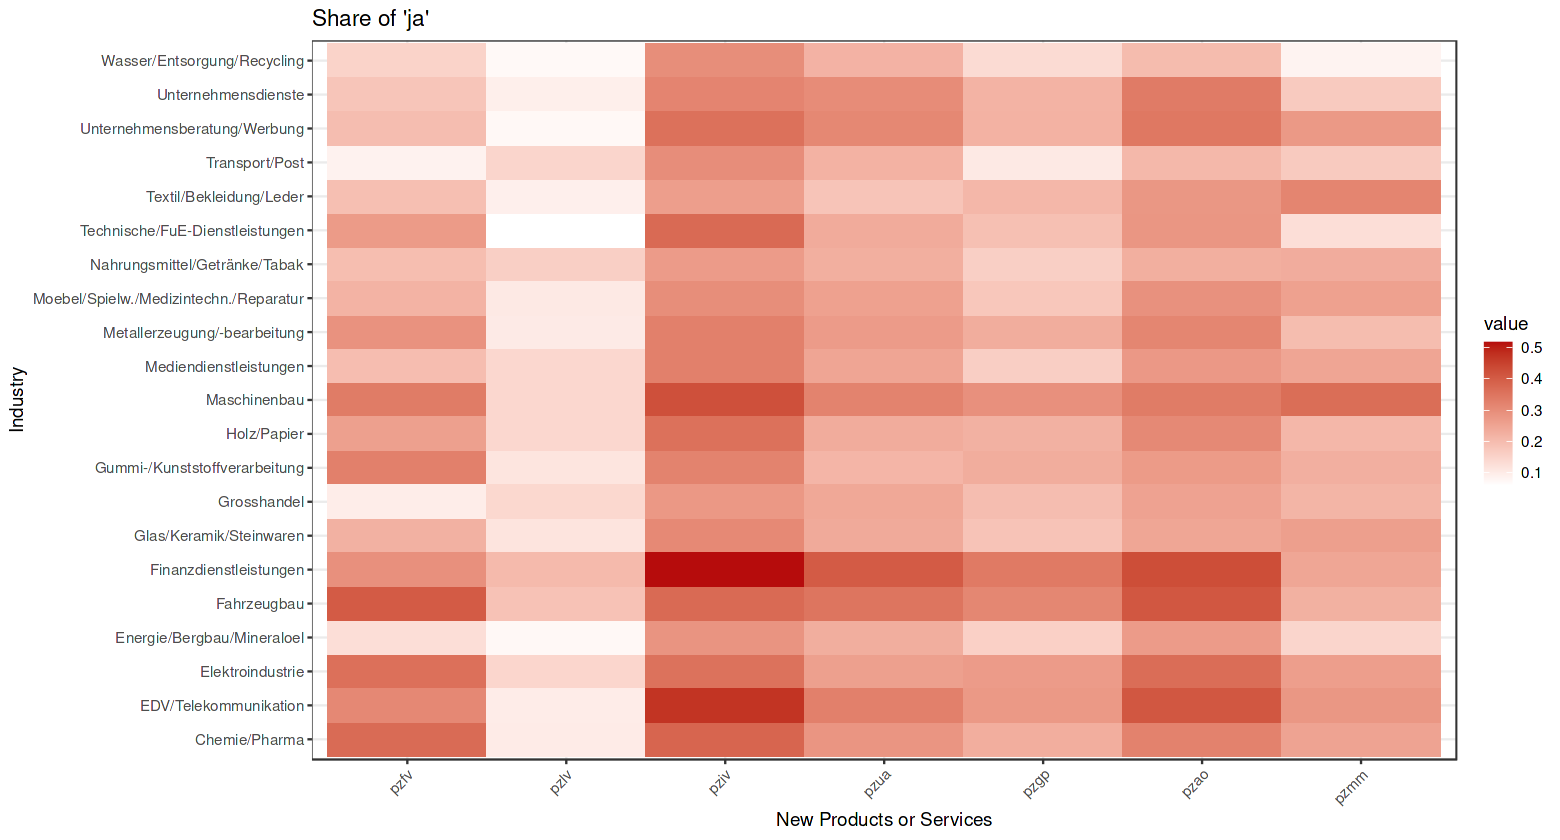

In [21]:
# pzfv            byte    %8.0g      janein     Produktionsverfahren, Verfahren zur Dienstleistungserbringung
# pzlv            byte    %8.0g      janein     Logistische Verfahren, Auslieferungs-/Vertriebsmethoden
# pziv            byte    %8.0g      janein     Informationsverarbeitung
# pzua            byte    %8.0g      janein     Unterst�tzende Verfahren f�r Administration/Verwaltung
# pzgp            byte    %8.0g      janein     Methoden zur Organisation von Gesch�ftsprozessen und der Gestaltung von
#                                                 Au�enbez
# pzao            byte    %8.0g      janein     Methoden der Arbeitsorganisation
# pzmm            byte    %8.0g      janein     Marketingmethoden

survey %>%
    .[, c("branche", "pzfv", "pzlv", "pziv", "pzua", "pzgp", "pzao", "pzmm")] %>%
    # calculate the share of 'ja' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja") / length(x)),
                by = branche, .SDcols = c("pzfv", "pzlv", "pziv", "pzua", "pzgp", "pzao", "pzmm")] %>%
    melt(id.vars = "branche") %>%
    ggplot(aes(x = branche, y = variable, fill = value)) +
    geom_tile() +
    coord_flip() +
    labs(x = "Industry", y = "New Products or Services", title = "Share of 'ja'") +
    theme_bw() +
    scale_fill_gradient(low = "white", high = "#b60c0c", na.value = "grey90",
                            guide = "colorbar") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

## R&D  Activities

In [22]:
# fueint          byte    %8.0g      janein     Unternehmensinterne Forschung und experimentelle Entwicklung (interne FuE)
#                                                 2020
# fueext          byte    %8.0g      janein     externe FuE-Aufwendungen
# fuekon          byte    %14.0g     fuekon     Betreiben von internen FuE 2020
# fueextde        byte    %8.0g      janein     Vergabe von FuE-Auftr�gen an Dritte 2020: Auftragnehmer in Deutschland
# fueextso        byte    %8.0g      janein     Vergabe von FuE-Auftr�gen an Dritte 2020: Auftragnehmer im Ausland
# fueoef          byte    %8.0g      janein     Finanzielle Beitr�ge der �ffentlichen Hand f�r FuE-Vorhaben
# fueoefmno       byte    %8.0g      janein     Keine 2020 von �ffentlichen Stellen ausbezahlten Mittel

survey %>%
    .[, c("branche", "fueint", "fueext", "fuekon", "fueextde", "fueextso", "fueoef", "fueoefmno")] %>%
    # calculate the share of 'ja' for each variable by industry
    head()

branche,fueint,fueext,fuekon,fueextde,fueextso,fueoef,fueoefmno
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Elektroindustrie,ja,nein,kontinuierlich,,,ja,nein
Metallerzeugung/-bearbeitung,nein,nein,nein,,,nein,
Maschinenbau,ja,ja,kontinuierlich,ja,,nein,
Energie/Bergbau/Mineraloel,nein,nein,nein,,,nein,
Energie/Bergbau/Mineraloel,nein,nein,nein,,,,
Elektroindustrie,ja,ja,kontinuierlich,,,,


In [34]:
# they are all character variables
# since many variables are character variables, we now pull out 
# variables that are non-character variables and take a look at them
survey %>%
    .[, .SD, .SDcols = is.numeric] %>%
    # check share of missing values
    .[, lapply(.SD, function(x) sum(is.na(x)) / length(x))] %>%
    melt() %>%
    .[value > 0.8, ]

Warning message in melt.data.table(.):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


variable,value
<fct>,<dbl>
wmneup,0.9643911
iavfueewr,0.8626795
iavfueso,0.8626795
fueoefms,0.8498918
iap2021,0.8345465
iap2022,0.8532363


Those variables have too many missing values, so we will not use them. It makes sense 
that firms will not share their R&D activities with others.

-iap2021 float %9.0g Development of innovation expenses in 2021 in 

-iap2021x float %14.0g stutz Trimming development of innovation expenses in 2021

-iap2022 float %9.0g Development of innovation expenses in 2022 in 

-iap2022x float %14.0g stutz Trimming development of innovation expenses in 2022

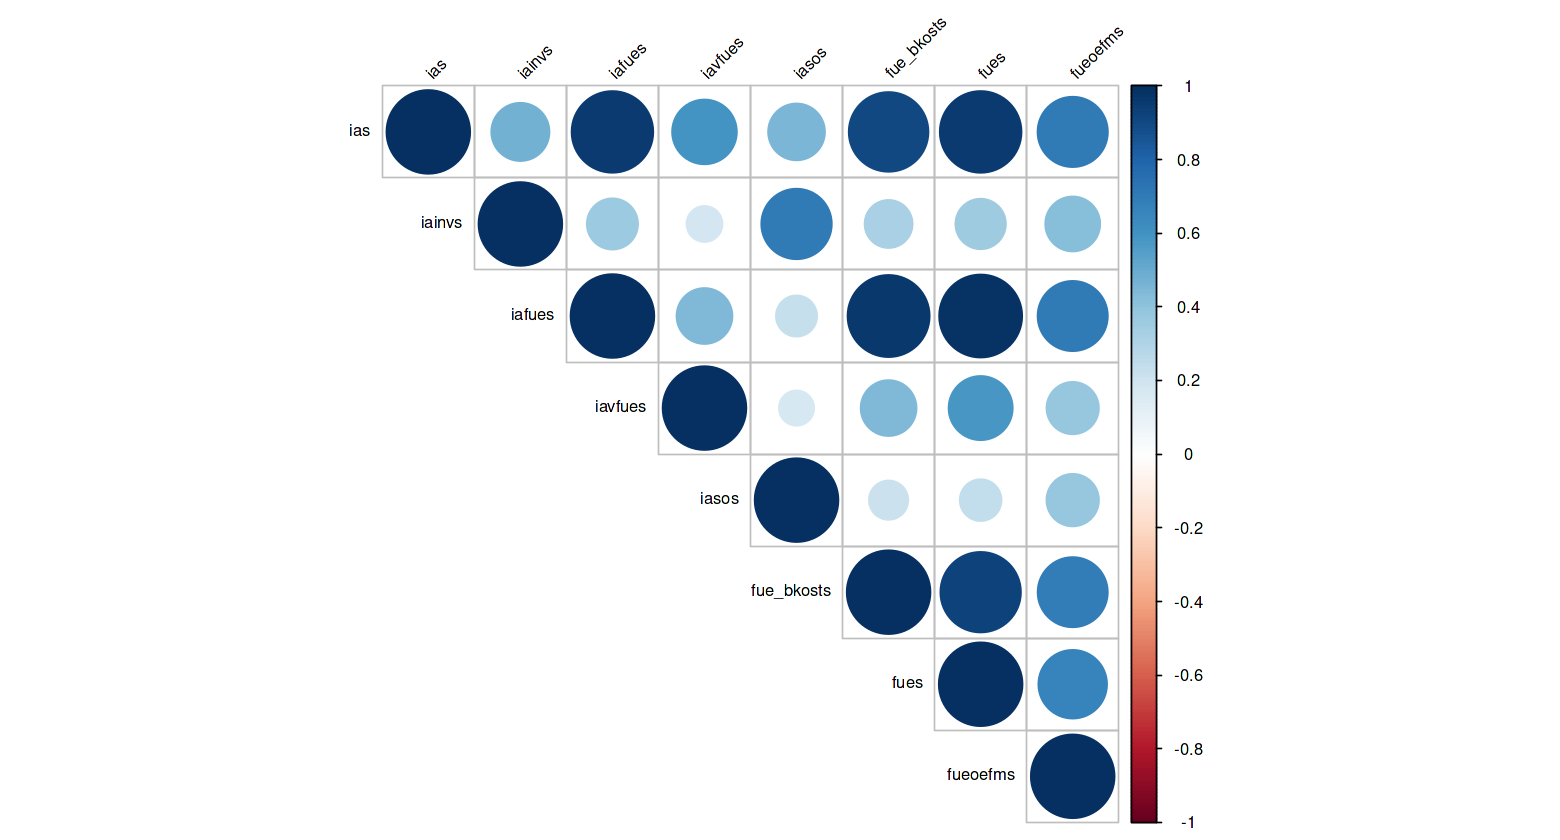

In [53]:
# ias float %9.0g Innovation intensity
# iainvs float %9.0g Intensity of investment in innovation
# iafues float %9.0g Intensity of internal R&D
# iavfues float %9.0g Intensity of external R&D
# iasos float %9.0g Intensity of other innovation expenses
# fue_bkosts float %9.0g Intensity of R&D personnel expenses
# fues float %9.0g Intensity of R&D
# fueoefms float %9.0g Intensity of public R&D funding
survey %>%
    .[, .(ias, iainvs, iafues, iavfues,
                    iasos, fue_bkosts, fues, fueoefms)] %>%
    # check correlation withou missing values
    cor(use = "pairwise.complete.obs") %>%
    # plot correlation matrix
    corrplot(type = "upper", method = "circle", tl.col = "black",
                tl.srt = 45, tl.cex = 0.8, tl.offset = 0.5)

## Public funding

In [60]:
survey %>%
    .[, .(branche, oeff)] %>%
    # calculate the share of 'ja' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja") / length(x)),
                by = branche, .SDcols = c("oeff")] %>%
    .[order(-oeff)]

branche,oeff
<chr>,<dbl>
Fahrzeugbau,0.29104478
Elektroindustrie,0.28027682
Maschinenbau,0.26341463
Chemie/Pharma,0.24705882
Metallerzeugung/-bearbeitung,0.24324324
Technische/FuE-Dienstleistungen,0.23972603
Energie/Bergbau/Mineraloel,0.23529412
Gummi-/Kunststoffverarbeitung,0.23270440
Textil/Bekleidung/Leder,0.22580645


## Environmental Innovation

![survey-section4](section_10.png)


In [19]:
# Here are the table and the variables.
 
# During the three years 2018 to 2020, did your enterprise introduce innovations with any of the following environmental
# benefits, and, if yes, was their contribution to environmental protection rather significant or insignificant?
 
# #oekpz1 - Reduced energy use per unit of output
# #oekpz2 - Reduced material use / use of water per unit of output
# #oekpz3 - Reduced CO2 ‚footprint’ (total CO2 production)
# #oekpz4 - Reduced air pollution (i.e. Sox,Nox) 
# #oekpz5 - Reduced water or soil pollution
# #oekpz6 - Reduced noise pollution
# #oekpz7 - Replaced fossil energy sources by renewable energy sources
# #oekpz8 - Replaced materials by less hazardous substitutes
# #oekpz9 - Recycled waste, water, or materials for own use or sale

Question 10.1 is about what firms did to reduce the environmental impact of their products/services. Question 10.2 is about incentives for environmental innovation.
We will analyze 10.1 first and then 10.2. In the end, we want to link 10.1 and 10.2 together by running a regression.

In [5]:
# environmental innovations within the firm
survey %>%
    .[, c("branche", "oekpz1", "oekpz2", "oekpz3", "oekpz4",
            "oekpz5", "oekpz6", "oekpz7", "oekpz8", "oekpz9")] %>%
    head()
# ja, bedeutend means yes, significant
# ja, gering means yes, insignificant

branche,oekpz1,oekpz2,oekpz3,oekpz4,oekpz5,oekpz6,oekpz7,oekpz8,oekpz9
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Elektroindustrie,nein,"ja, bedeutend",nein,nein,nein,nein,nein,"ja, gering","ja, gering"
Metallerzeugung/-bearbeitung,nein,nein,nein,nein,nein,nein,nein,nein,nein
Maschinenbau,"ja, gering","ja, gering","ja, gering",nein,nein,nein,nein,nein,nein
Energie/Bergbau/Mineraloel,nein,nein,nein,nein,nein,nein,nein,nein,nein
Energie/Bergbau/Mineraloel,,,,,,,,,
Elektroindustrie,,,,,,,,,


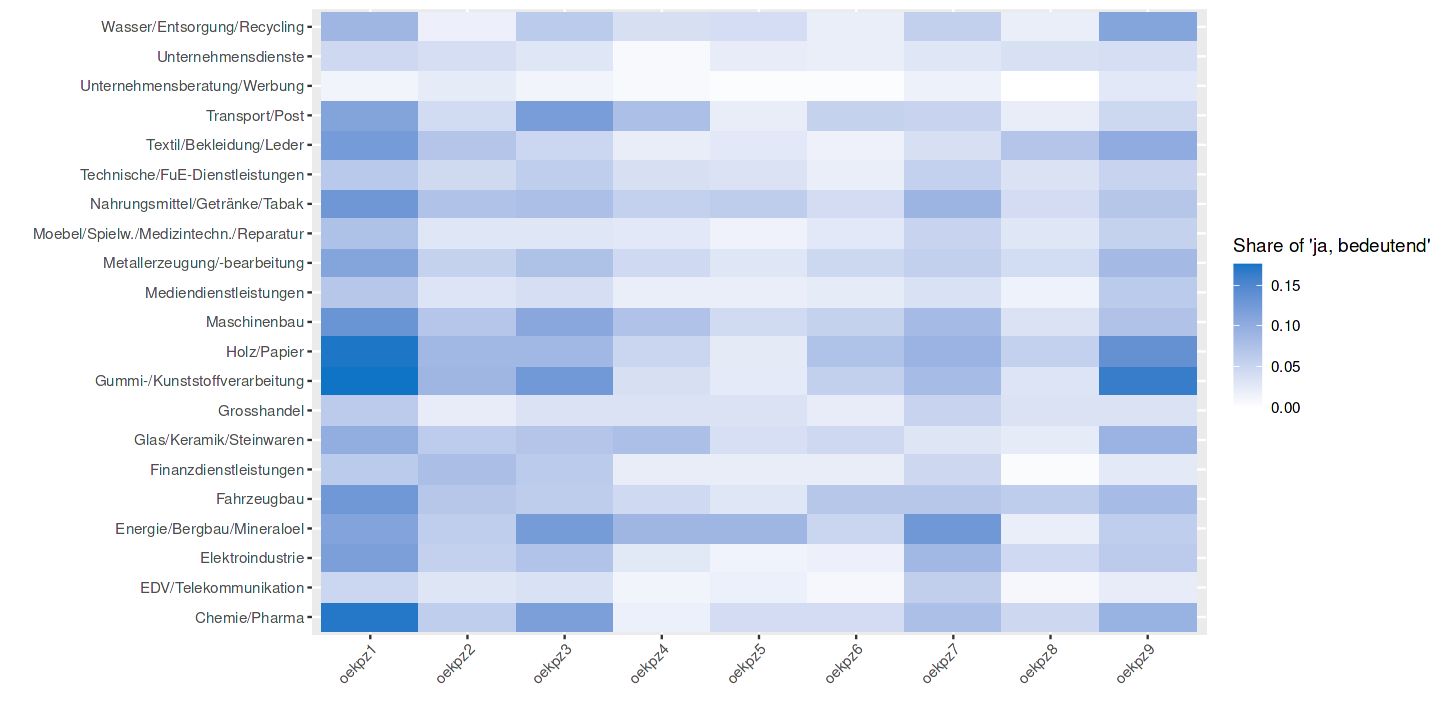

In [10]:
# we will use heat map to visualize the share of 'ja, bedeutend' 
# for each variable by industry
options(repr.plot.width = 12, repr.plot.height = 6)
survey %>%
    .[, .(branche, oekpz1, oekpz2, oekpz3, oekpz4,
                    oekpz5, oekpz6, oekpz7, oekpz8, oekpz9)] %>%
    # calculate the share of 'ja, bedeutend' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja, bedeutend") / length(x)),
                by = branche, .SDcols = c("oekpz1", "oekpz2", "oekpz3", "oekpz4",
                                            "oekpz5", "oekpz6", "oekpz7", 
                                            "oekpz8", "oekpz9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#0f74c6") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'ja, bedeutend'")

As we can see that only a small share of firms have environmental innovation. This is very common in the real world. If we hold oekpz1 constant, we can see that most of industries are trying to reduce the energy cost. 

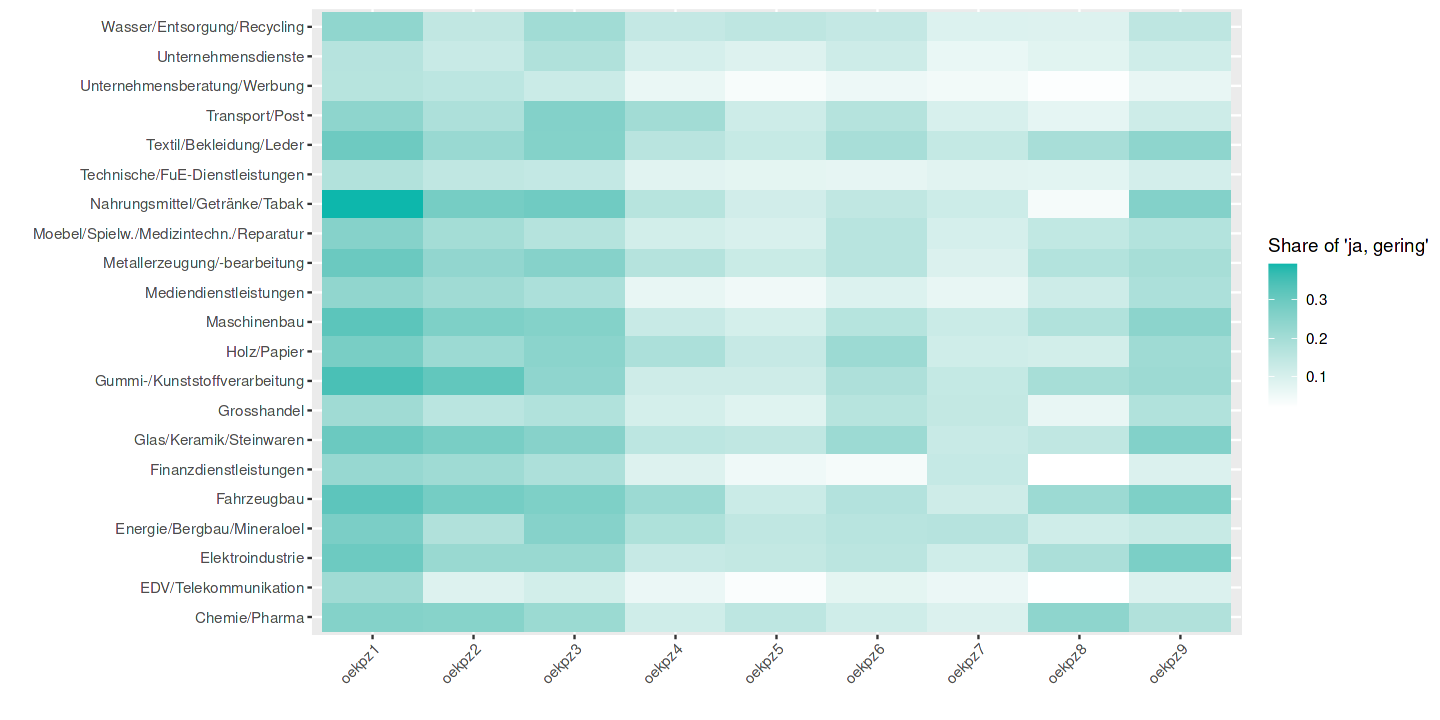

In [14]:
# we will use heat map to visualize the share of 'ja, gering'
# we will use heat map to visualize the share of 'ja, bedeutend' 
# for each variable by industry
options(repr.plot.width = 12, repr.plot.height = 6)
survey %>%
    .[, .(branche, oekpz1, oekpz2, oekpz3, oekpz4,
                    oekpz5, oekpz6, oekpz7, oekpz8, oekpz9)] %>%
    # calculate the share of 'ja, bedeutend' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "ja, gering") / length(x)),
                by = branche, .SDcols = c("oekpz1", "oekpz2", "oekpz3", "oekpz4",
                                            "oekpz5", "oekpz6", "oekpz7", 
                                            "oekpz8", "oekpz9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#0db7ac") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'ja, gering'")

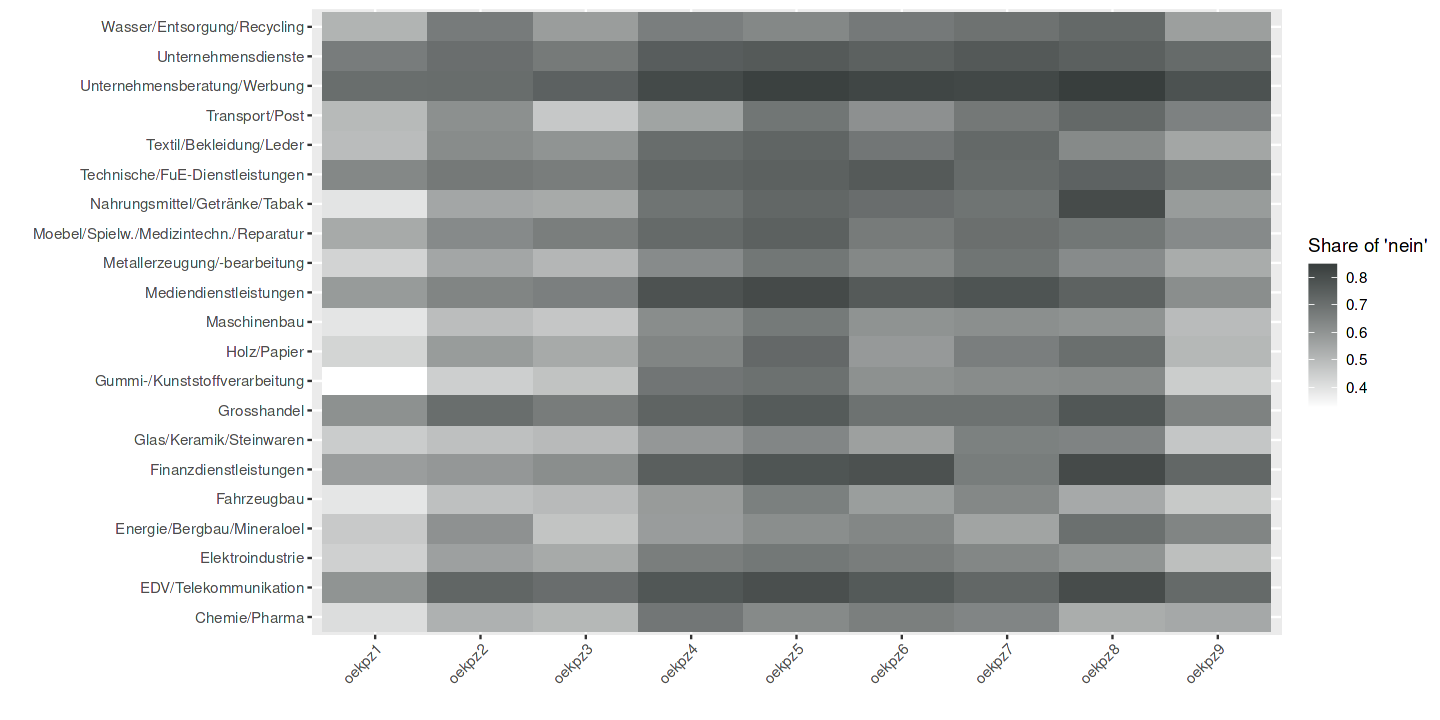

In [16]:
# we will use heat map to visualize the share of 'nein'
options(repr.plot.width = 12, repr.plot.height = 6)
survey %>%
    .[, .(branche, oekpz1, oekpz2, oekpz3, oekpz4,
                    oekpz5, oekpz6, oekpz7, oekpz8, oekpz9)] %>%
    # calculate the share of 'ja, bedeutend' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "nein") / length(x)),
                by = branche, .SDcols = c("oekpz1", "oekpz2", "oekpz3", "oekpz4",
                                            "oekpz5", "oekpz6", "oekpz7", 
                                            "oekpz8", "oekpz9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#383e3d") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'nein'")

In [17]:
# now let's check the impact of their products
# oekpd1,..., oekpd4
survey %>%
    .[, c("branche", "oekpd1", "oekpd2", "oekpd3", "oekpd4")] %>%
    head()

branche,oekpd1,oekpd2,oekpd3,oekpd4
<chr>,<chr>,<chr>,<chr>,<chr>
Elektroindustrie,nein,"ja, gering","ja, gering",nein
Metallerzeugung/-bearbeitung,nein,nein,nein,nein
Maschinenbau,"ja, gering",nein,nein,nein
Energie/Bergbau/Mineraloel,nein,nein,nein,nein
Energie/Bergbau/Mineraloel,,,,
Elektroindustrie,,,,


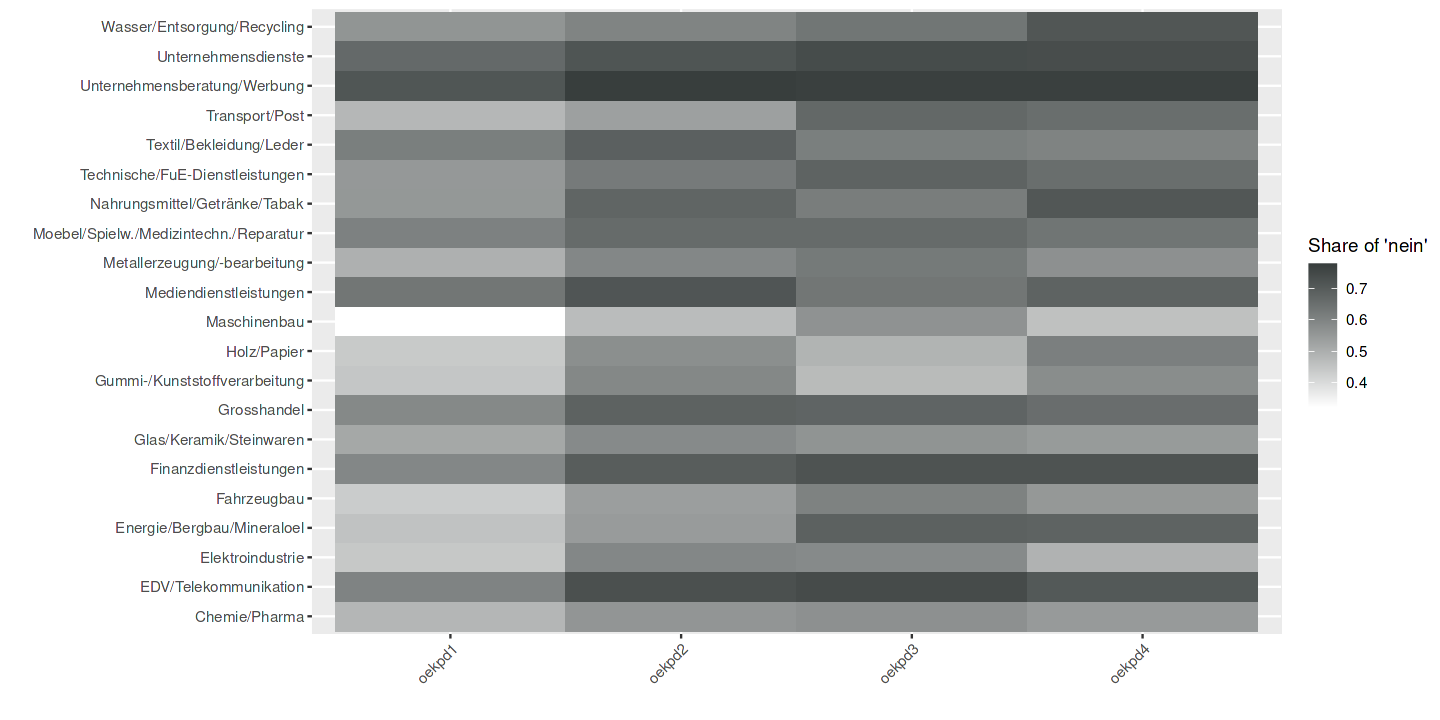

In [18]:
# now let's check the impact of their products
# oekpd1,..., oekpd4
survey %>%
    .[, c("branche", "oekpd1", "oekpd2", "oekpd3", "oekpd4")] %>%
    # calculate the share of 'nein' for each variable by industry
    .[, lapply(.SD, function(x) sum(x == "nein") / length(x)),
                by = branche, .SDcols = c("oekpd1", "oekpd2", "oekpd3", "oekpd4")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#383e3d") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'nein'")

As you can see that 50% of firms claims that their products/services are more energy efficient. But the environment revolution is far from over. We still have a long way to go. For instance, most of firms do no claim that their products/services are more recyclable or facilitate the recycling of products/services.

In [20]:
# During 2018 to 2020, how important were the following factors in driving your enterprise’s decisions to introduce
# innovations with environmental benefits?
 
# #oekfak1 - Existing environmental regulations
# #oekfak2 - Existing environmental taxes, charges or fees
# #oekfak3 - Environmental regulations or taxes expected in the future
# #oekfak4 - Government grants,  subsidies etc. for environmental innovations
# #oekfak5 - Current or expected market demand for environmental innovations
# #oekfak6 - Improving your enterprise’s reputation
# #oekfak7 - Voluntary actions or standards for environmental good practice within your sector
# #oekfak8 - Increasing cost of energy,  water or material
# #oekfak9 - Need to meet requirements for public procurement contracts

In [22]:
survey %>%
    .[, c("branche", "oekfak1", "oekfak2", "oekfak3", "oekfak4",
                    "oekfak5", "oekfak6", "oekfak7", "oekfak8", "oekfak9")] %>%
    .[sample(.N, 5)]

branche,oekfak1,oekfak2,oekfak3,oekfak4,oekfak5,oekfak6,oekfak7,oekfak8,oekfak9
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Technische/FuE-Dienstleistungen,mittel,nein,nein,nein,gering,gering,nein,gering,nein
Technische/FuE-Dienstleistungen,hoch,mittel,mittel,gering,gering,gering,mittel,mittel,gering
Nahrungsmittel/Getränke/Tabak,,,,,,,,,
Elektroindustrie,gering,nein,gering,nein,nein,nein,gering,mittel,nein
Elektroindustrie,gering,gering,gering,gering,gering,gering,gering,gering,gering


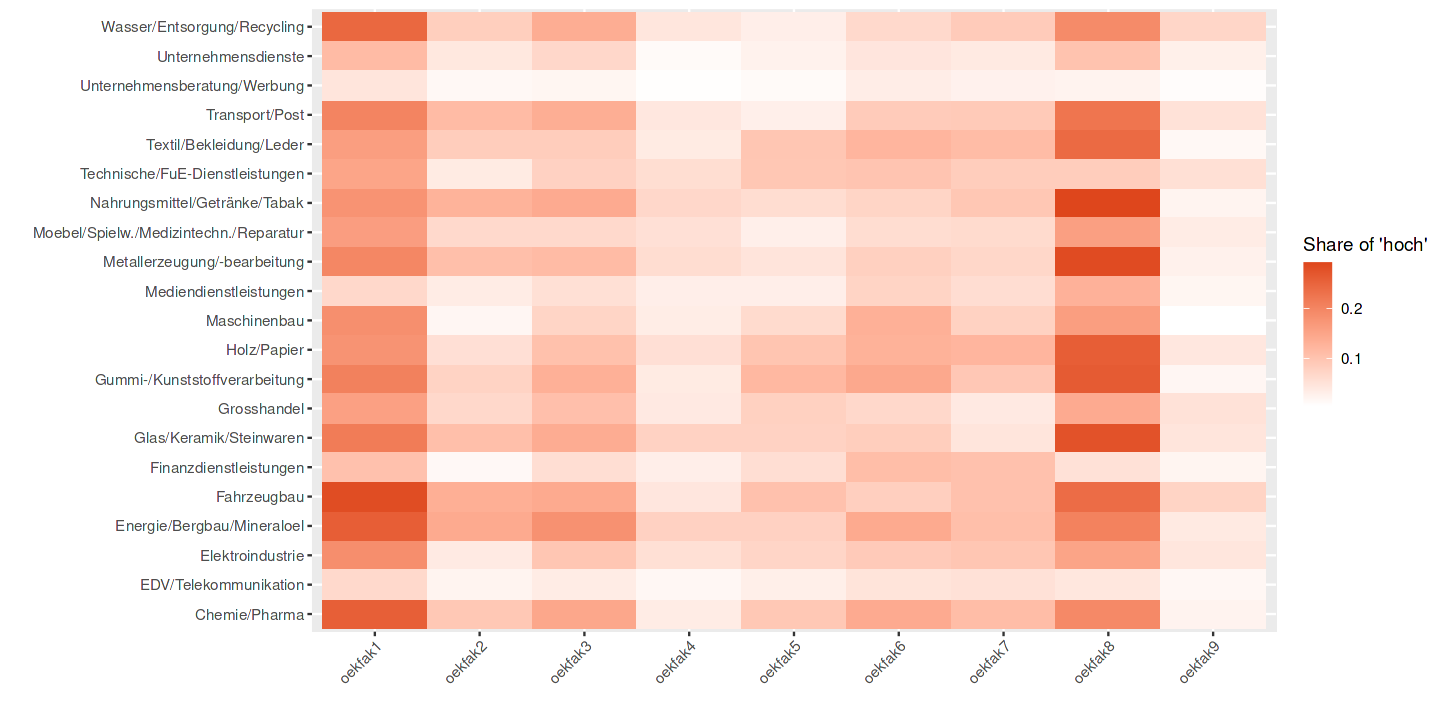

In [25]:
# now we will challenge ourselves to 
# calculate the share of each category of each variable by industry
survey %>%
    .[, c("branche", "oekfak1", "oekfak2", "oekfak3", "oekfak4",
                    "oekfak5", "oekfak6", "oekfak7", "oekfak8", "oekfak9")] %>%
    # calculate the share of each category of each variable by industry
    # categories are: hoch, nein, gering, mittel
    .[, lapply(.SD, function(x) sum(x == "hoch") / length(x)),
                by = branche, .SDcols = c("oekfak1", "oekfak2", "oekfak3", "oekfak4",
                                            "oekfak5", "oekfak6", "oekfak7", 
                                            "oekfak8", "oekfak9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#de461c") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'hoch'")

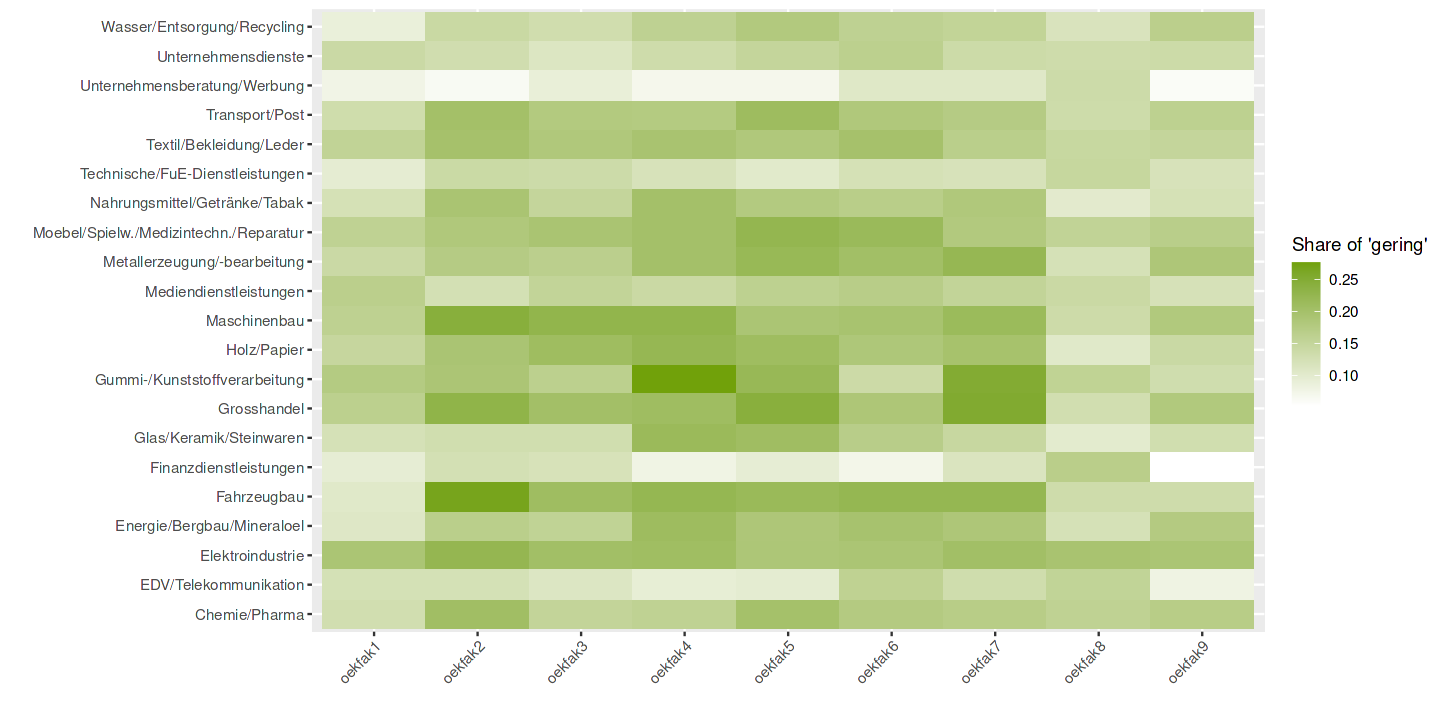

In [27]:
# gering means low
survey %>%
    .[, c("branche", "oekfak1", "oekfak2", "oekfak3", "oekfak4",
                    "oekfak5", "oekfak6", "oekfak7", "oekfak8", "oekfak9")] %>%
    # calculate the share of each category of each variable by industry
    # categories are: hoch, nein, gering, mittel
    .[, lapply(.SD, function(x) sum(x == "gering") / length(x)),
                by = branche, .SDcols = c("oekfak1", "oekfak2", "oekfak3", "oekfak4",
                                            "oekfak5", "oekfak6", "oekfak7", 
                                            "oekfak8", "oekfak9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#71a10a") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'gering'")

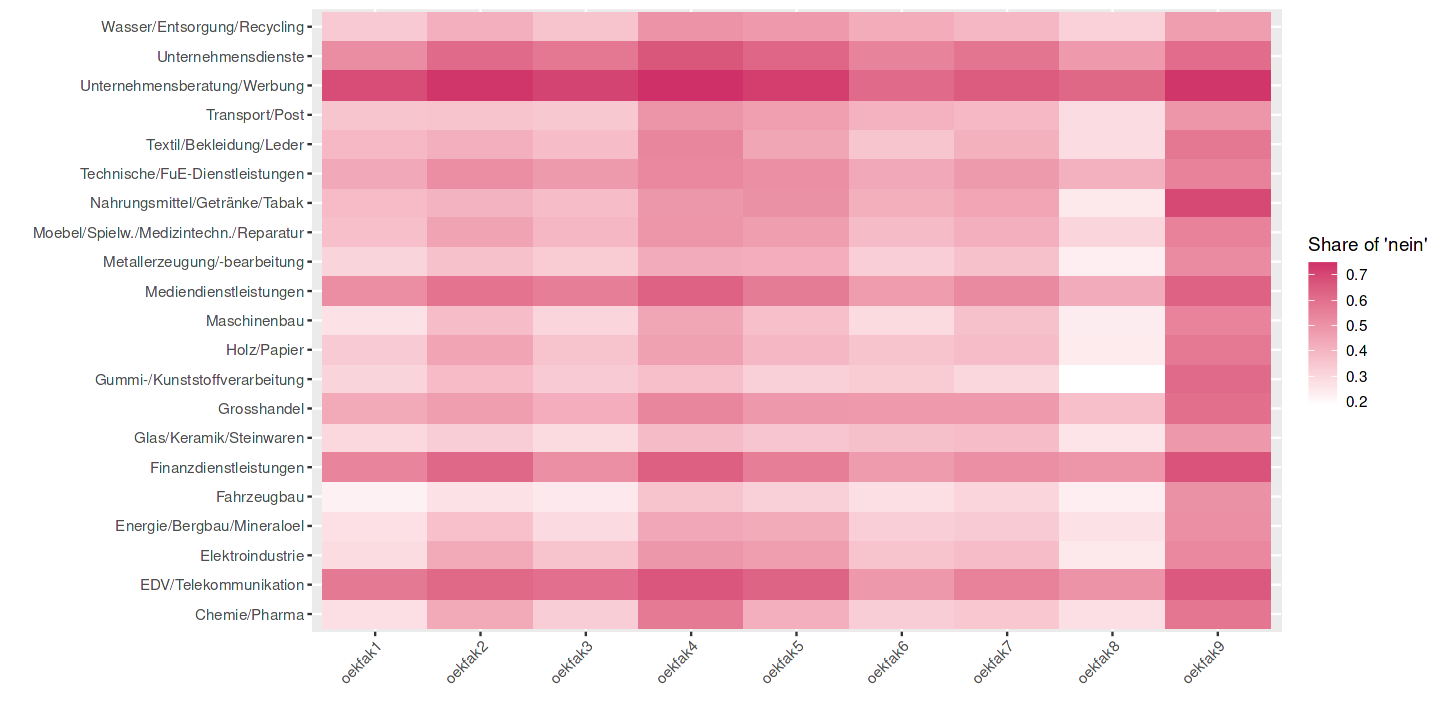

In [29]:
# now we will challenge ourselves to 
# calculate the share of each category of each variable by industry
survey %>%
    .[, c("branche", "oekfak1", "oekfak2", "oekfak3", "oekfak4",
                    "oekfak5", "oekfak6", "oekfak7", "oekfak8", "oekfak9")] %>%
    # calculate the share of each category of each variable by industry
    # categories are: hoch, nein, gering, mittel
    .[, lapply(.SD, function(x) sum(x == "nein") / length(x)),
                by = branche, .SDcols = c("oekfak1", "oekfak2", "oekfak3", "oekfak4",
                                            "oekfak5", "oekfak6", "oekfak7", 
                                            "oekfak8", "oekfak9")] %>%
    # melt the data
    melt(id.vars = "branche") %>%
    # plot the heat map
    ggplot(aes(x = variable, y = branche, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "#cf3068") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x = "", y = "", fill = "Share of 'nein'")

Overall, those heatmap could tell us lots of stories. We will not go into details here.
The way to use it is to:

- check horizontal lines for each industry
- check vertical lines for each category

From the above analysis we learned that two factors are very important for environmental innovation:

- oekfak1: Existing environmental regulations
- oekfak8: increasing energy costs

Now we want to check whether those two factors indeed push firms to have environmental innovation or not. To do this, we could:

- use contingency table
- run a regression

In [30]:
# our dependent variables
#oekpz1 - Reduced energy use per unit of output
#oekpz3 - Reduced CO2 ‚footprint’ (total CO2 production)
#oekpz4 - Reduced air pollution (i.e. Sox,Nox) 
#oekpz9 - Recycled waste, water, or materials for own use or sale

# our independent variables
#oekfak1 - Existing environmental regulations
#oekfak8 - Increasing cost of energy,  water or material

In [44]:
# contigency table for oekpz1 and oekfak1
survey %>%
    .[, .(oekpz1, oekfak1)] %>%
    # remove empty values
    .[oekpz1 != "" & oekfak1 != ""] %>%
    # calculate the share of contingency table
    table() %>%
    prop.table()

               oekfak1
oekpz1              gering       hoch     mittel       nein
  ja, bedeutend 0.01753555 0.04834123 0.02654028 0.01848341
  ja, gering    0.06350711 0.07748815 0.07796209 0.08080569
  nein          0.07654028 0.07322275 0.06469194 0.37488152

In [93]:
# we will run ordinal logistic regression
library(MASS)

# formula for ordinal logistic regression
formula1 <- ordered(oekpz1, levels=c("nein", "ja, gering", "ja, bedeutend")) ~ oekfak1 + oekfak8 + branche

model1 <- polr(formula1, data = survey)

summary(model1)


Re-fitting to get Hessian




Call:
polr(formula = formula1, data = survey)

Coefficients:
                                                 Value Std. Error t value
oekfak1gering                                  0.82010     0.3394  2.4162
oekfak1hoch                                    1.23540     0.3373  3.6624
oekfak1mittel                                  1.04809     0.3365  3.1144
oekfak1nein                                    0.29112     0.3387  0.8595
oekfak8gering                                  0.27756     0.3156  0.8795
oekfak8hoch                                    0.82489     0.3131  2.6346
oekfak8mittel                                  0.55012     0.3125  1.7605
oekfak8nein                                   -0.86074     0.3188 -2.7002
brancheEDV/Telekommunikation                  -0.43240     0.2408 -1.7957
brancheElektroindustrie                       -0.27003     0.2156 -1.2527
brancheEnergie/Bergbau/Mineraloel             -0.40098     0.2330 -1.7209
brancheFahrzeugbau                            -0.07

In [94]:
# let's calculate the p-values
coef(summary(model1)) %>%
    as.data.table(keep.rownames = TRUE) %>%
    .[, p_value := 2 * pnorm(abs(`t value`), lower.tail = FALSE)] %>%
    kable()


Re-fitting to get Hessian






|rn                                            |      Value| Std. Error|    t value|   p_value|
|:---------------------------------------------|----------:|----------:|----------:|---------:|
|oekfak1gering                                 |  0.8201040|  0.3394239|  2.4161647| 0.0156850|
|oekfak1hoch                                   |  1.2353996|  0.3373153|  3.6624470| 0.0002498|
|oekfak1mittel                                 |  1.0480875|  0.3365273|  3.1144203| 0.0018431|
|oekfak1nein                                   |  0.2911213|  0.3387034|  0.8595169| 0.3900554|
|oekfak8gering                                 |  0.2775573|  0.3155697|  0.8795434| 0.3791067|
|oekfak8hoch                                   |  0.8248879|  0.3130990|  2.6345912| 0.0084239|
|oekfak8mittel                                 |  0.5501235|  0.3124811|  1.7605018| 0.0783228|
|oekfak8nein                                   | -0.8607431|  0.3187729| -2.7001770| 0.0069303|
|brancheEDV/Telekommunikation         


Re-fitting to get Hessian




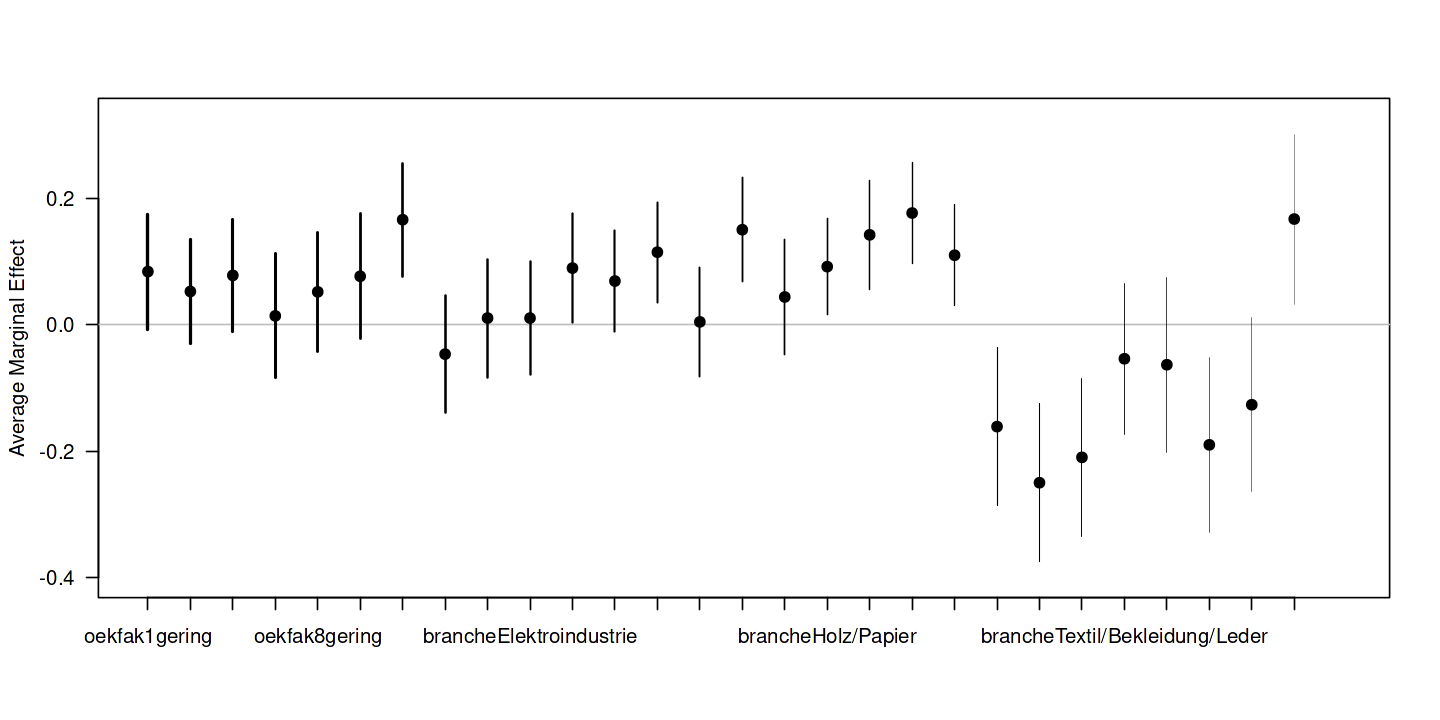

In [95]:
# calculate the marginal effects
# make sure install the package first
# install.packages("margins")
library(margins)
plot(margins(model1))

In [71]:
# the above model has many industries
# we could also focus on chemical industry
survey %>%
    # calculate the frequency of each industry
    .[, .N, by = branche]

branche,N
<chr>,<int>
Elektroindustrie,289
Metallerzeugung/-bearbeitung,333
Maschinenbau,205
Energie/Bergbau/Mineraloel,204
Gummi-/Kunststoffverarbeitung,159
Nahrungsmittel/Getränke/Tabak,219
Fahrzeugbau,134
Technische/FuE-Dienstleistungen,292
Mediendienstleistungen,254


In [72]:
# create a dummy based on branche
# called chem_dummy == 1 if branche == "Chemie/Pharma"
survey %>%
    .[, chem_dummy := ifelse(branche == "Chemie/Pharma", 1, 0)] %>%
    .[, .N, by = chem_dummy]

chem_dummy,N
<dbl>,<int>
0,4913
1,170


In [90]:
# nor run the model with dummy variable
formula2 <- ordered(oekpz1, levels=c("nein", "ja, gering", "ja, bedeutend")) ~ oekfak1 + oekfak8 + chem_dummy

model2 <- polr(formula2, data = survey)

summary(model2)


Re-fitting to get Hessian




Call:
polr(formula = formula2, data = survey)

Coefficients:
                Value Std. Error t value
oekfak1gering  0.8153     0.3373  2.4175
oekfak1hoch    1.2189     0.3356  3.6323
oekfak1mittel  1.0525     0.3346  3.1452
oekfak1nein    0.2822     0.3368  0.8380
oekfak8gering  0.2864     0.3139  0.9124
oekfak8hoch    0.8944     0.3114  2.8717
oekfak8mittel  0.5978     0.3107  1.9241
oekfak8nein   -0.8916     0.3170 -2.8126
chem_dummy     0.4066     0.1766  2.3022

Intercepts:
                         Value   Std. Error t value
nein|ja, gering           1.1637  0.1775     6.5556
ja, gering|ja, bedeutend  3.1477  0.1840    17.1053

Residual Deviance: 6995.454 
AIC: 7017.454 
(683 observations deleted due to missingness)

In [91]:
# ja, bedeutend means yes, significant

coef(summary(model2)) %>%
    as.data.table(keep.rownames = TRUE) %>%
    .[, p_value := 2 * pnorm(abs(`t value`), lower.tail = FALSE)] %>%
    kable()


Re-fitting to get Hessian






|rn                            |      Value| Std. Error|    t value|   p_value|
|:-----------------------------|----------:|----------:|----------:|---------:|
|oekfak1gering                 |  0.8153216|  0.3372582|  2.4174995| 0.0156276|
|oekfak1hoch                   |  1.2188571|  0.3355622|  3.6322840| 0.0002809|
|oekfak1mittel                 |  1.0525036|  0.3346427|  3.1451567| 0.0016600|
|oekfak1nein                   |  0.2822404|  0.3368176|  0.8379622| 0.4020520|
|oekfak8gering                 |  0.2863516|  0.3138591|  0.9123570| 0.3615808|
|oekfak8hoch                   |  0.8943528|  0.3114390|  2.8716786| 0.0040830|
|oekfak8mittel                 |  0.5978361|  0.3107077|  1.9241108| 0.0543407|
|oekfak8nein                   | -0.8915895|  0.3170000| -2.8125848| 0.0049145|
|chem_dummy                    |  0.4065565|  0.1765921|  2.3022354| 0.0213219|
|nein&#124;ja, gering          |  1.1636596|  0.1775052|  6.5556358| 0.0000000|
|ja, gering&#124;ja, bedeutend |  3.14


Re-fitting to get Hessian




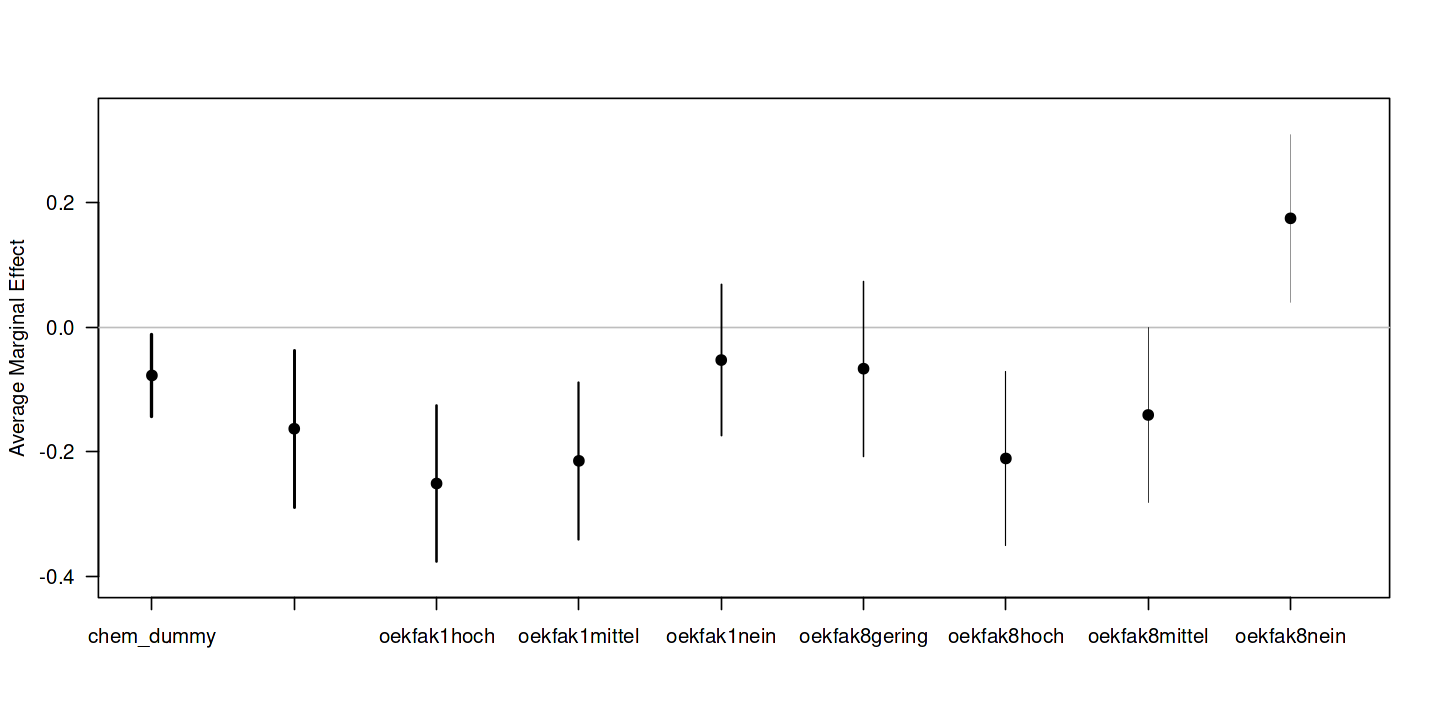

In [92]:
plot(margins(model2))

As we can see that when we do not control for other factors, the effect of oekfak1 and oekfak8 are not very big. Using only dummy for chemical industry is not a good way to model the effect. 